In [ ]:
pip install sidetable

In [ ]:
#importing required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
import sidetable
from tabulate import tabulate
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#setting max number of columns to be displayed to 100, to get a better view.
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

## Loading Application Data¶

In [ ]:
application_data=pd.read_csv('/content/drive/MyDrive/dataset/application_data.csv')

In [ ]:
#checking shape 
application_data.shape

(307511, 122)

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,"307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,499.00","307,233.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","104,582.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,509.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","134,133.00","306,851.00","246,546.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00",...,"97,312.00","153,161.00","93,997.00","137,829.00","151,450.00","127,568.00","157,504.00","103,023.00","92,646.00","143,620.00","152,683.00","154,491.00","98,869.00","124,921.00","97,312.00","153,161.00","93,997.00","137,829.00","159,080.00","306,490.00","306,490.00","306,490.00","306,490.00","307,510.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","307,511.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00","265,992.00"
mean,"278,180.52",0.08,0.42,"168,797.92","599,026.00","27,108.57","538,396.21",0.02,"-16,037.00","63,815.05","-4,986.12","-2,994.20",12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,...,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,"102,790.18",0.27,0.72,"237,123.15","402,490.78","14,493.74","369,446.46",0.01,"4,363.99","141,275.77","3,522.89","1,509.45",11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0

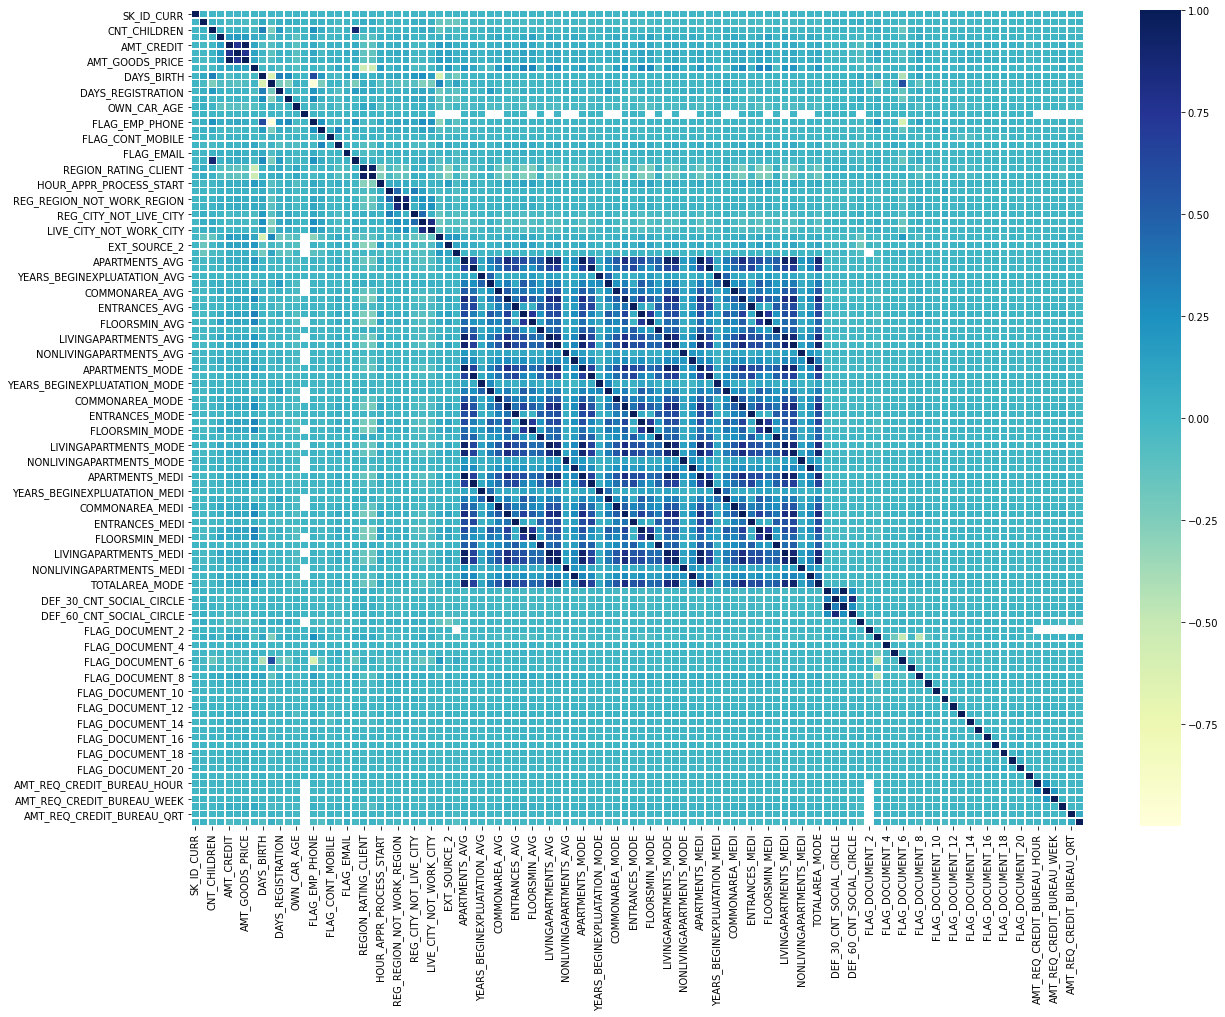

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(application_data.corr(),cmap="YlGnBu",linewidths=.5)
plt.show()


In [ ]:
application_data.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,...,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00
TARGET,-0.00,1.00,0.02,-0.00,-0.03,-0.01,-0.04,-0.04,0.08,-0.04,0.04,0.05,0.04,0.00,0.05,0.03,0.00,-0.02,-0.00,0.01,0.06,0.06,-0.02,0.01,0.01,0.00,0.04,0.05,0.03,-0.16,-0.16,-0.18,-0.03,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.04,-0.03,-0.01,-0.03,-0.03,-0.00,-0.01,-0.03,-0.02,-0.01,-0.02,...,-0.02,-0.03,-0.00,-0.01,-0.03,-0.02,-0.01,-0.02,-0.02,-0.03,-0.02,-0.04,-0.03,-0.01,-0.02,-0.03,-0.00,-0.01,-0.03,0.01,0.03,0.01,0.03,0.06,0.01,0.04,-0.00,-0.00,-0.03,-0.00,-0.01,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,0.02
CNT_CHILDREN,-0.00,0.02,1.00,0.01,0.00,0.02,-0.00,-0.03,0.33,-0.24,0.18,-0.03,0.01,0.00,0.24,0.06,-0.00,-0.03,0.02,0.88,0.03,0.02,-0.01,-0.01,0.01,0.01,0.02,0.07,0.07,-0.14,-0.02,-0.04,-0.01,-0.01,0.01,0.03,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,0.00,-0.01,-0.01,0.01,0.03,...,-0.01,-0.01,0.00,0.00,-0.01,-0.01,0.01,0.03,0.00,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,0.00,-0.01,0.02,-0.00,0.02,-0.00,-0.01,0.00,0.06,-0.00,-0.02,-0.16,-0.00,0.05,-0.00,-0.00,-0.01,0.00,0.00,-0.01,0.00,0.01,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,-0.04
AMT_INCOME_TOTAL,-0.00,-0.00,0.01,1.00,0.16,0.19,0.16,0.07,0.03,-0.06,0.03,0.01,-0.12,0.00,0.06,-0.02,-0.01,0.00,0.04,0.02,-0.09,-0.09,0.04,0.03,0.06,0.06,0.00,0.01,0.01,0.03,0.06,-0.03,0.03,0.02,0.01,0.04,0.09,0.05,0.01,0.06,0.14,-0.00,0.11,0.04,0.03,0.07,0.03,0.01,0.01,0.04,...,0.09,0.03,0.03,0.06,0.03,0.02,0.01,0.04,0.09,0.04,0.00,0.06,0.14,-0.00,0.10,0.04,0.03,0.07,0.04,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00,-0.02,0.00,0.00,-0.05,0.00,0.07,0.02,0.00,0.00,0.

### Checking Columns with High Null Percentage

In [ ]:
pd.set_option('display.max_rows',150)

In [ ]:
#Finding Percentage of Missing values in each and every column
df_null= np.round(100*application_data.isnull().sum()/len(application_data),2)
df_null

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [ ]:
#Finding the columns that have more than or equal to 50% null values and storing it to columns_to_drop.
columns_to_drop=application_data.columns[100*application_data.isnull().sum()/len(application_data)>=25]
columns_to_drop

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [ ]:
#dropping the columns where the null values are >=25%.
application_data.drop(labels=columns_to_drop,axis=1,inplace=True)

In [ ]:
#verifying if the columns are dropped.
application_data.shape

(307511, 72)

# Imputation
Finding the best values to impute below columns that have <=25% of null values

In [ ]:
#Finding columns with <= 25% missing columns

null_info = pd.DataFrame(100*application_data.isnull().sum()/len(application_data))
null_info.columns = ['Null Percentage']
null_info[(null_info['Null Percentage'] > 0) & (null_info['Null Percentage'] <=25)]

,Null Percentage
AMT_ANNUITY,0.00
AMT_GOODS_PRICE,0.09
NAME_TYPE_SUITE,0.42
CNT_FAM_MEMBERS,0.00
EXT_SOURCE_2,0.21
EXT_SOURCE_3,19.83
OBS_30_CNT_SOCIAL_CIRCLE,0.33
DEF_30_CNT_SOCIAL_CIRCLE,0.33
OBS_60_CNT_SOCIAL_CIRCLE,0.33
DEF_60_CNT_SOCIAL_CIRCLE,0.33


## Columns To Impute
### We have chosen the following columns to consider the best value to impute the missing values with



* AMT_ANNUITY
* AMT_GOODS_PRICE
* NAME_TYPE_SUITE
* CNT_FAM_MEMBERS
* OBS_60_CNT_SOCIAL_CIRCLE














### AMT_ANNUITY Imputation

Quantile	AMT_ANNUITY


0.50    24,903.00
0.80    37,516.50
0.85    40,806.00
0.90    45,954.00
0.95    53,325.00
1.00   258,025.50
Name: AMT_ANNUITY, dtype: float64

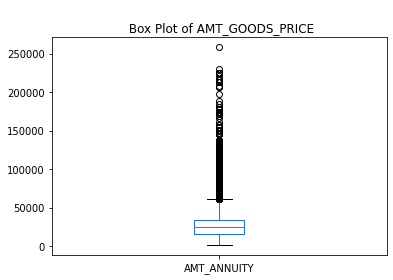

In [ ]:
# Boxplot to check for outliers
application_data['AMT_ANNUITY'].plot.box()
plt.title('\n Box Plot of AMT_GOODS_PRICE')

# Calculating Quantiles
print('Quantile\tAMT_ANNUITY')
application_data['AMT_ANNUITY'].quantile([0.5,0.8,0.85,0.90,0.95,1])

From the above box plot of **AMT_ANNUITY**, there are a lot of outliers.

Calculating Quantiles confirms the same. There is a huge jump from 95% value to max value .
Hence, **Median** : 24903 is the best value to impute the missing values in AMT_ANNUITY, since mean is not robust to outliers.

In [ ]:
application_data['AMT_ANNUITY'].fillna(value=24903,inplace=True)

# AMT_GOODS_PRICE Imputation

Quantile	AMT_GOODS_PRICE


0.50     450,000.00
0.80     814,500.00
0.85     900,000.00
0.90   1,093,500.00
0.95   1,305,000.00
1.00   4,050,000.00
Name: AMT_GOODS_PRICE, dtype: float64

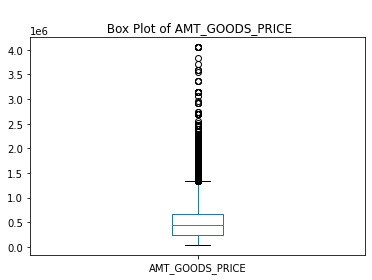

In [ ]:
print('Quantile\tAMT_GOODS_PRICE')
application_data['AMT_GOODS_PRICE'].plot.box()
plt.title('\n Box Plot of AMT_GOODS_PRICE')
application_data['AMT_GOODS_PRICE'].quantile([0.5,0.8,0.85,0.90,0.95,1])

The above box plot show significant number of outliers. This confirmed by the quantiles.
There is a huge jump from 95 percentile value to Maximum value.
In this case, since there are many outliers, Mean is not a good representation of the data since it is not robust to outliers.

Hence ,Median : 450000 is the best metric to impute missing values

In [ ]:
application_data['AMT_GOODS_PRICE'].fillna(value=450000,inplace=True)

### NAME_TYPE_SUITE Imputation

Data type of NAME_TYPE_SUITE :  object 


Category	Normalized Count

 Unaccompanied     0.81
Family            0.13
Spouse, partner   0.04
Children          0.01
Other_B           0.01
Other_A           0.00
Group of people   0.00
Name: NAME_TYPE_SUITE, dtype: float64


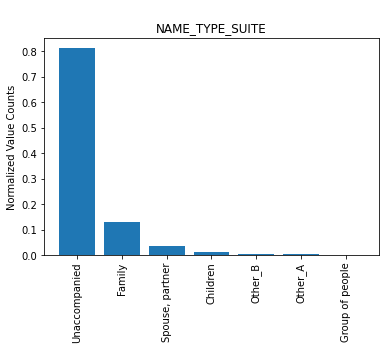

In [ ]:
print('Data type of NAME_TYPE_SUITE : ',application_data['NAME_TYPE_SUITE'].dtype,'\n\n')
print('Category\tNormalized Count\n\n',application_data['NAME_TYPE_SUITE'].value_counts(normalize=True))
data = application_data['NAME_TYPE_SUITE'].value_counts(normalize=True)
plt.bar(data.index,data.values)
# data.hist()
plt.xticks(rotation=90)
plt.ylabel('Normalized Value Counts')
plt.title('\nNAME_TYPE_SUITE');

NAME_TYPE_SUITE is a categorical variable.
The best metric to impute missing values is Mode of the data.
From the above plot, 'Unaccompanied' is the Mode

Hence, Unaccompanied is the best value to impute the missing values

In [ ]:
application_data['NAME_TYPE_SUITE'].fillna(value='Unaccompanied',inplace=True)

CNT_FAM_MEMBERS Imputation

In [ ]:
application_data['CNT_FAM_MEMBERS'].value_counts()

2.00     158357
1.00      67847
3.00      52601
4.00      24697
5.00       3478
6.00        408
7.00         81
8.00         20
9.00          6
10.00         3
14.00         2
16.00         2
12.00         2
20.00         2
11.00         1
13.00         1
15.00         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [ ]:
application_data['CNT_FAM_MEMBERS'].fillna(value=2,inplace=True)#value is imputed based on mode as this is categorical column

EXT_SOURCE_2 Imputation


Data type of EXT_SOURCE_2 :  float64 


Quantile	Value


0.50   0.57
0.80   0.68
0.85   0.70
0.90   0.72
0.95   0.75
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64

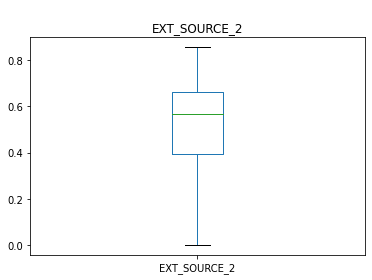

In [ ]:
print('Data type of EXT_SOURCE_2 : ',application_data['EXT_SOURCE_2'].dtype,'\n\n')
application_data['EXT_SOURCE_2'].plot.box()
plt.title('\nEXT_SOURCE_2');
print('Quantile\tValue')
application_data['EXT_SOURCE_2'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
round(application_data['EXT_SOURCE_2'].mean(),2)

0.51

EXT_SOURCE_2 is the credit rating by an external source. It is a numerical continuous variable. The above bar plot and the quantiles show no outliers. In this case Mean and Median are very close. Because there are no outliers, Mean : 0.51 could be used to impute missing values.

In [ ]:
application_data['EXT_SOURCE_2'].fillna(value=0.51,inplace=True)

In [ ]:
application_data.isnull().sum()/len(application_data)*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

In [ ]:
application_data.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True)#these columns are dropped as all these are explaining same

In [ ]:
application_data.shape

(307511, 67)

Data type ofDAYS_LAST_PHONE_CHANGE:  float64 


Quantile	Value


0.50   -757.00
0.80   -161.00
0.85     -5.00
0.90      0.00
0.95      0.00
1.00      0.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

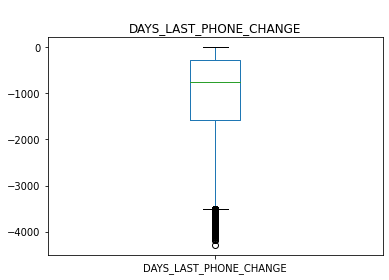

In [ ]:
print('Data type ofDAYS_LAST_PHONE_CHANGE: ',application_data['DAYS_LAST_PHONE_CHANGE'].dtype,'\n\n')
application_data['DAYS_LAST_PHONE_CHANGE'].plot.box()
plt.title('\nDAYS_LAST_PHONE_CHANGE');
print('Quantile\tValue')
application_data['DAYS_LAST_PHONE_CHANGE'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=0.757,inplace=True)

Data type ofAMT_REQ_CREDIT_BUREAU_YEAR:  float64 


Quantile	Value


0.50    1.00
0.80    3.00
0.85    4.00
0.90    4.00
0.95    6.00
1.00   25.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

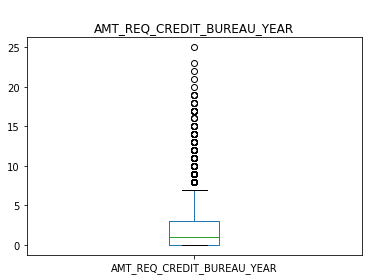

In [ ]:
print('Data type ofAMT_REQ_CREDIT_BUREAU_YEAR: ',application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].dtype,'\n\n')
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.box()
plt.title('\nAMT_REQ_CREDIT_BUREAU_YEAR');
print('Quantile\tValue')
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=1,inplace=True)

Data type ofDEF_60_CNT_SOCIAL_CIRCLE:  float64 


Quantile	Value


0.50    0.00
0.80    0.00
0.85    0.00
0.90    0.00
0.95    1.00
1.00   24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

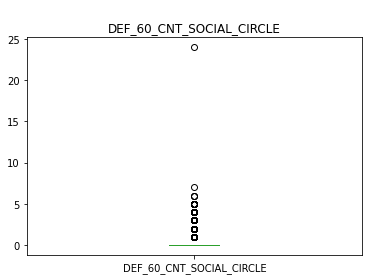

In [ ]:
print('Data type ofDEF_60_CNT_SOCIAL_CIRCLE: ',application_data['DEF_60_CNT_SOCIAL_CIRCLE'].dtype,'\n\n')
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.title('\nDEF_60_CNT_SOCIAL_CIRCLE');
print('Quantile\tValue')
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

Data type ofOBS_60_CNT_SOCIAL_CIRCLE:  float64 


Quantile	Value


0.50     0.00
0.80     3.00
0.85     3.00
0.90     4.00
0.95     6.00
1.00   344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

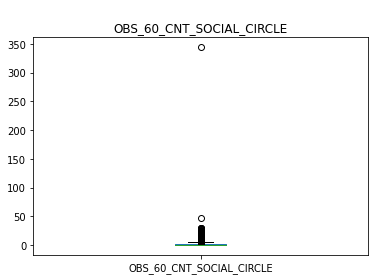

In [ ]:
print('Data type ofOBS_60_CNT_SOCIAL_CIRCLE: ',application_data['OBS_60_CNT_SOCIAL_CIRCLE'].dtype,'\n\n')
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].plot.box()
plt.title('\nOBS_60_CNT_SOCIAL_CIRCLE');
print('Quantile\tValue')
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

Data type of DEF_30_CNT_SOCIAL_CIRCLE:  float64 


Quantile	Value


0.50    0.00
0.80    0.00
0.85    0.00
0.90    1.00
0.95    1.00
1.00   34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

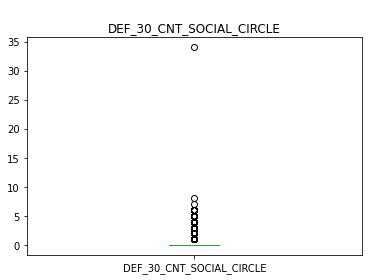

In [ ]:
print('Data type of DEF_30_CNT_SOCIAL_CIRCLE: ',application_data['DEF_30_CNT_SOCIAL_CIRCLE'].dtype,'\n\n')
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.title('\nDEF_30_CNT_SOCIAL_CIRCLE');
print('Quantile\tValue')
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

Data type of OBS_30_CNT_SOCIAL_CIRCLE:  float64 


Quantile	Value


0.50     0.00
0.80     3.00
0.85     3.00
0.90     4.00
0.95     6.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

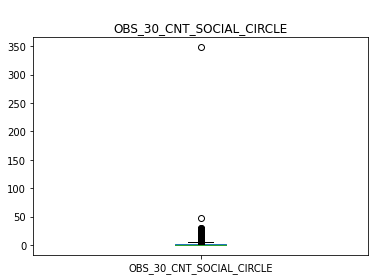

In [ ]:
print('Data type of OBS_30_CNT_SOCIAL_CIRCLE: ',application_data['OBS_30_CNT_SOCIAL_CIRCLE'].dtype,'\n\n')
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].plot.box()
plt.title('\nOBS_30_CNT_SOCIAL_CIRCLE');
print('Quantile\tValue')
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=0,inplace=True)

## EXT_SOURCE_3 Imputation

Data type of EXT_SOURCE_3 :  float64 


Quantile	Value


0.50   0.54
0.80   0.69
0.85   0.72
0.90   0.75
0.95   0.79
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

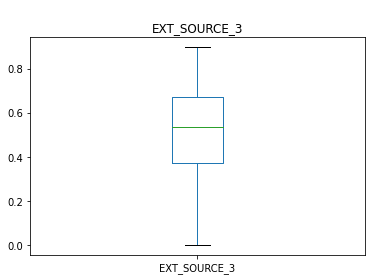

In [ ]:
print('Data type of EXT_SOURCE_3 : ',application_data['EXT_SOURCE_3'].dtype,'\n\n')
application_data['EXT_SOURCE_3'].plot.box()
plt.title('\nEXT_SOURCE_3');
print('Quantile\tValue')
application_data['EXT_SOURCE_3'].quantile([0.5,0.8,0.85,0.90,0.95,1])

In [ ]:
round(application_data['EXT_SOURCE_3'].mean(),2)

0.51

EXT_SOURCE_3 is the credit rating by an external source. It is a numerical continuous variable. The above bar plot and the quantiles show no outliers. In this case Mean and Median are very close. Because there are no outliers, Mean : **0.51** could be used to impute missing values

In [ ]:
application_data['EXT_SOURCE_3'].fillna(value=0.51,inplace=True)

Checking for Disguised Missing Values¶

In [ ]:
#Replacing XAN with np.nan in Gender column : 
application_data['CODE_GENDER'] = application_data['CODE_GENDER'].replace('XNA',np.nan)


In [ ]:
application_data['CODE_GENDER'].fillna(value='F')

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

In [ ]:
# replacing Unknown in NAME_FAMILY_STATUS with np.nan 
application_data['NAME_FAMILY_STATUS'] = application_data['NAME_FAMILY_STATUS'].replace('Unknown',np.nan)


In [ ]:
application_data['NAME_FAMILY_STATUS'].fillna(value='Married')

0         Single / not married
1                      Married
2         Single / not married
3               Civil marriage
4         Single / not married
                  ...         
307506               Separated
307507                   Widow
307508               Separated
307509                 Married
307510                 Married
Name: NAME_FAMILY_STATUS, Length: 307511, dtype: object

In [ ]:
# replacing XNA values in ORGANIZATION_TYPE 
application_data['ORGANIZATION_TYPE'] = application_data['ORGANIZATION_TYPE'].replace('XNA',np.nan)


In [ ]:
#Since ORGANIZATION_TYPE is a categorical variable, the missing values could be imputed with Mode : Business Entity Type 3

In [ ]:
application_data['ORGANIZATION_TYPE'].fillna(value='Business Entity Type 3')

0         Business Entity Type 3
1                         School
2                     Government
3         Business Entity Type 3
4                       Religion
                   ...          
307506                  Services
307507    Business Entity Type 3
307508                    School
307509    Business Entity Type 1
307510    Business Entity Type 3
Name: ORGANIZATION_TYPE, Length: 307511, dtype: object

In [ ]:
#Data Type Checks

In [ ]:
pd.DataFrame(application_data.dtypes)

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


In [ ]:
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,"-3,648.00",-2120
1,-16765,-1188,"-1,186.00",-291
2,-19046,-225,"-4,260.00",-2531
3,-19005,-3039,"-9,833.00",-2437
4,-19932,-3038,"-4,311.00",-3458


In [ ]:
#The DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH have negative values, since they are in past with respect to date of application.
#To standard size these columns for the purpose of analysis, we could converted them to their absolute values

In [ ]:
columns_to_convert = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
application_data[columns_to_convert] = application_data[columns_to_convert].abs()
application_data[columns_to_convert].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,"9,461.00",637.00,"3,648.00","2,120.00"
1,"16,765.00","1,188.00","1,186.00",291.00
2,"19,046.00",225.00,"4,260.00","2,531.00"
3,"19,005.00","3,039.00","9,833.00","2,437.00"
4,"19,932.00","3,038.00","4,311.00","3,458.00"


In [ ]:
# checking columns with binary values
values_per_column = application_data.nunique().sort_values()
col_values_dtype = pd.DataFrame(index=values_per_column.index, data= {'Unique Values' : values_per_column.values, 'Data Type' : application_data.dtypes})
col_values_dtype

,Unique Values,Data Type
REG_REGION_NOT_WORK_REGION,2,int64
FLAG_WORK_PHONE,2,int64
FLAG_DOCUMENT_4,2,int64
FLAG_PHONE,2,int64
FLAG_EMAIL,2,int64
REG_REGION_NOT_LIVE_REGION,2,int64
FLAG_DOCUMENT_21,2,int64
LIVE_REGION_NOT_WORK_REGION,2,int64
REG_CITY_NOT_LIVE_CITY,2,int64
FLAG_EMP_PHONE,2,int64


In [ ]:
#The above columns are 'categorical' variables with only two values. But they have been read as 'int' datatype
#We could convert them into 'categorical' data type

In [ ]:
# converting to category data type 
convert_to_cat = col_values_dtype[col_values_dtype['Unique Values']<=8].index
application_data[convert_to_cat] = application_data[convert_to_cat].astype('category')

In [ ]:
# check if the columns are converted
values_per_column = application_data.nunique().sort_values()
new_categories  = pd.DataFrame(index=values_per_column.index, data= {'Unique Values' : values_per_column.values, 'Data Type' : application_data.dtypes})
new_categories

,Unique Values,Data Type
REG_REGION_NOT_WORK_REGION,2,category
FLAG_WORK_PHONE,2,category
FLAG_DOCUMENT_4,2,category
FLAG_PHONE,2,category
FLAG_EMAIL,2,category
REG_REGION_NOT_LIVE_REGION,2,category
FLAG_DOCUMENT_21,2,category
LIVE_REGION_NOT_WORK_REGION,2,category
REG_CITY_NOT_LIVE_CITY,2,category
FLAG_EMP_PHONE,2,category


In [ ]:
## Checking for Outliers

In [ ]:
#Checking for outliers in the following numerical columns
#AMT_INCOME_TOTAL
#AMT_CREDIT
#AMT_ANNUITY
#AMT_GOODS_PRICE
#DAYS_BIRTH

In [ ]:
# Adding a new column "AGE_YEARS" using 'DAYS_BIRTH' with age in years
def days_to_years(x) : 
    if x < 0 : 
        x = -1*x 
    return x//365
application_data['AGE_YEARS'] = application_data['DAYS_BIRTH'].apply(days_to_years)
application_data['AGE_YEARS'].describe()

count   307,511.00
mean         43.44
std          11.95
min          20.00
25%          34.00
50%          43.00
75%          53.00
max          69.00
Name: AGE_YEARS, dtype: float64

Box Plots of "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH" 



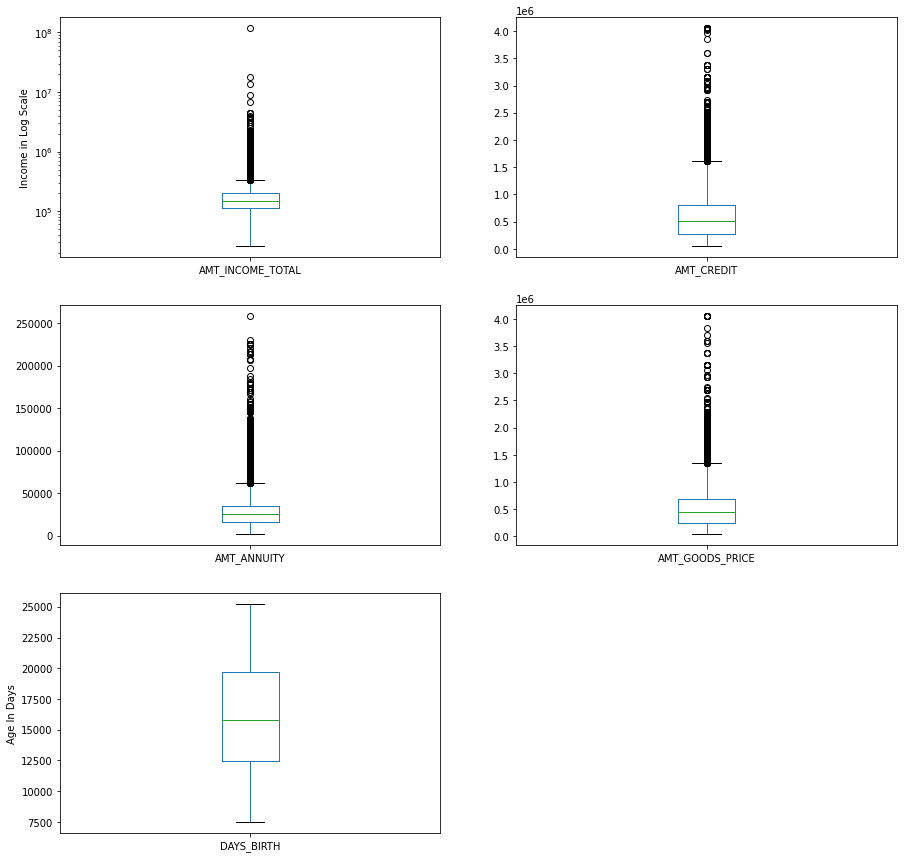

In [ ]:
# Box plots of the above numerical variables 
outlier_check_col = ["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH"]

fig,ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
ax[0,0].set_yscale('log')
ax[0,0].set(ylabel ='Income in Log Scale')
application_data[outlier_check_col[0]].plot.box(ax=ax[0,0],);
application_data[outlier_check_col[1]].plot.box(ax=ax[0,1]);
application_data[outlier_check_col[2]].plot.box(ax=ax[1,0]);
application_data[outlier_check_col[3]].plot.box(ax=ax[1,1]);
ax[2,0].set(ylabel ='Age In Days')
application_data[outlier_check_col[4]].plot.box(ax=ax[2,0]); 
ax[2,1].axis('off')
print('Box Plots of "AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH" \n')

In [ ]:

## Calculating quantiles for the above columns
pd.options.display.float_format = '{:,.2f}'.format
for col in outlier_check_col : 
    print(col,'\n',application_data[col].quantile([0.5,0.8,0.85,0.90,0.95,1]),'\n\n')
    

AMT_INCOME_TOTAL 
 0.50       147,150.00
0.80       225,000.00
0.85       234,000.00
0.90       270,000.00
0.95       337,500.00
1.00   117,000,000.00
Name: AMT_INCOME_TOTAL, dtype: float64 


AMT_CREDIT 
 0.50     513,531.00
0.80     900,000.00
0.85   1,024,740.00
0.90   1,133,748.00
0.95   1,350,000.00
1.00   4,050,000.00
Name: AMT_CREDIT, dtype: float64 


AMT_ANNUITY 
 0.50    24,903.00
0.80    37,516.50
0.85    40,806.00
0.90    45,954.00
0.95    53,325.00
1.00   258,025.50
Name: AMT_ANNUITY, dtype: float64 


AMT_GOODS_PRICE 
 0.50     450,000.00
0.80     814,500.00
0.85     900,000.00
0.90   1,093,500.00
0.95   1,305,000.00
1.00   4,050,000.00
Name: AMT_GOODS_PRICE, dtype: float64 


DAYS_BIRTH 
 0.50   15,750.00
0.80   20,474.00
0.85   21,316.00
0.90   22,181.00
0.95   23,204.00
1.00   25,229.00
Name: DAYS_BIRTH, dtype: float64 




In [ ]:
#Outliers in Numerical Columns
#From the above box plots and quantile calculations, we see that
#AMT_INCOME_TOTAL has huge jump from 95th Percentile (337,500.00) to Maximum value (117,000,000.00) {346 times 95th Percentile}.
#Apart from this jump, there are several values > 1.5 times IQR. All of these are deemed outliers.
#To avoid skewed results of analysis, values greater than 95th percentile value may be capped to 95th Percentile value (337,500.00)

#AMT_CREDIT also has a huge jump from 95th Percentile (1,350,000.00) to Maximum value (4,050,000.00) {3 times 95th percentile}.
#Apart from this jump, there are several values > 1.5 times IQR. All of these are deemed outliers.
#To avoid skewed results of analysis, values greater than 95th percentile value may be capped to 95th Percentile value (1,350,000.00)

#Similarly , AMT_ANNUITY, AMT_ANNUITY have outliers and they could be capped to 95th percentile values.

#DAYS_BIRTH has no outliers

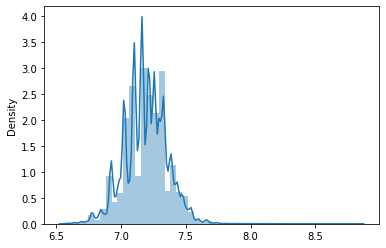

In [ ]:
from scipy.stats import boxcox
bx_1,a=boxcox(application_data['AMT_INCOME_TOTAL'])
sns.distplot(bx_1)

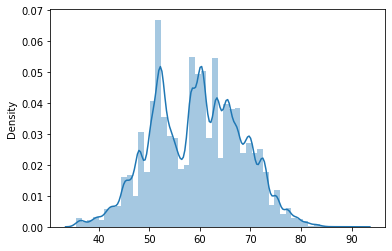

In [ ]:
from scipy.stats import boxcox
bx_1,a=boxcox(application_data['AMT_CREDIT'])
sns.distplot(bx_1)

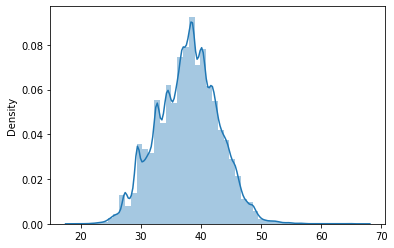

In [ ]:
from scipy.stats import boxcox
bx_1,a=boxcox(application_data['AMT_ANNUITY'])
sns.distplot(bx_1)

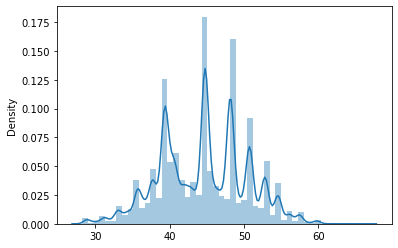

In [ ]:
from scipy.stats import boxcox
bx_1,a=boxcox(application_data['AMT_GOODS_PRICE'])
sns.distplot(bx_1)

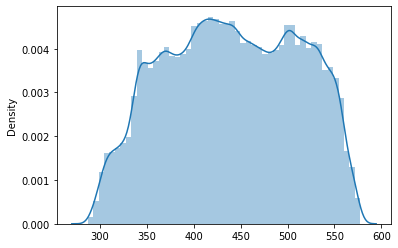

In [ ]:
from scipy.stats import boxcox
bx_1,a=boxcox(application_data['DAYS_BIRTH'])
sns.distplot(bx_1)

In [ ]:
#Binning Continuous Variables

Income Range	 Count
125000-150000       47890
100000-125000       43701
200000-225000       40797
75000-100000        39806
150000-175000       34663
175000-200000       29644
50000-75000         19375
250000-275000       12733
225000-250000        7340
300000-325000        6752
350000-375000        4537
25000-50000          4517
275000-300000        4306
425000-450000        3113
500000 and above     2702
325000-350000        2122
400000-425000        1811
375000-400000        1265
475000-500000         312
450000-475000         125
0-25000                 0
Name: AMT_INCOME_CAT, dtype: int64


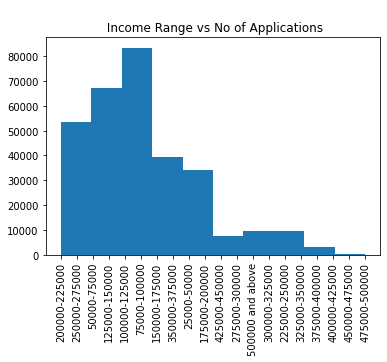

In [ ]:
# AMT_INCOME_TOTAL
min_income = int(application_data['AMT_INCOME_TOTAL'].min())
max_income = int(application_data['AMT_INCOME_TOTAL'].max())


bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
intervals = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_data['AMT_INCOME_CAT']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=intervals)
print('Income Range\t Count')
print(application_data['AMT_INCOME_CAT'].value_counts())

income_cat = application_data['AMT_INCOME_CAT'].value_counts()
plt.hist(application_data['AMT_INCOME_CAT'])

plt.title('\n Income Range vs No of Applications')
plt.xticks(rotation=90);

Credit Range	 Count
900000 and above    58912
250000-300000       31759
200000-250000       23054
500000-550000       22678
400000-450000       18239
0-150000            18159
150000-200000       17985
300000-350000       16205
650000-700000       15051
450000-500000       13799
750000-800000       12380
800000-850000       11559
550000-600000       11554
850000-900000       10233
350000-400000       10133
600000-650000        8998
700000-750000        6813
Name: AMT_CREDIT_RANGE, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

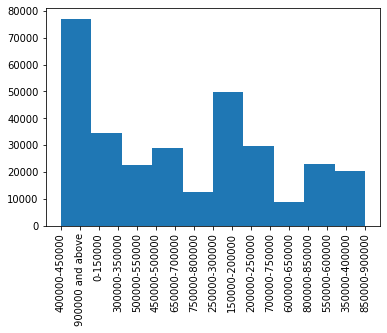

In [ ]:
#AMT_CREDIT
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
intervals = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=intervals)
application_data['AMT_CREDIT_RANGE'] = application_data['AMT_CREDIT_RANGE'].astype('category')
print('Credit Range\t Count')
credit_range = application_data['AMT_CREDIT_RANGE'].value_counts()
print(credit_range)
plt.hist(application_data['AMT_CREDIT_RANGE'])
plt.xticks(rotation=90)

### Data imbalance

In [ ]:
# Target Variable - 1: Client with Payment difficulties, 0 : All other cases 
application_data['TARGET'].value_counts()/len(application_data['TARGET'])*100

0   91.93
1    8.07
Name: TARGET, dtype: float64

In [ ]:
#From the above, you can see that this data set contains 91.9% of records about Clients with Payment difficulties and 0.08% records about all other cases.
#Ratio of classes = .919/0.08 = 11.375
#This represents an huge Data Imbalance
#The dataset is skewed towards 'Clients with Payment difficulties'

In [ ]:
#Data Set division wrt TARGET

In [ ]:
application_data0=application_data.loc[application_data["TARGET"]==0]
application_data1=application_data.loc[application_data["TARGET"]==1]

In [ ]:
columnsForAnalysis = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED','FLAG_MOBIL', 'FLAG_CONT_MOBILE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT_W_CITY',
                      'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
        'DAYS_LAST_PHONE_CHANGE' ,'AGE_YEARS', 'AMT_INCOME_CAT',
       'AMT_CREDIT_RANGE']

In [ ]:
#Analysis

In [ ]:
#Univariate Analysis

In [ ]:
# LOAN DATA

In [ ]:
# function for categorical variable univariate analysis
def cat_univariate_analysis(column_name,figsize=(10,5)) : 
    # print unique values
    print('TARGET 0\n', application_data0[column_name].unique(),'\n')
    print('TARGET 1\n',application_data1[column_name].unique(),'\n')
    
    # column vs target count plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=column_name,hue='TARGET',data=application_data)
    title = column_name + ' vs Number of Applications'
    ax.set(title= title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 10,
                format(height),
                ha="center")
    # Percentages 
    print('All Other Cases (TARGET : 0)')
    print(pd.DataFrame(application_data0.stb.freq([column_name])),'\n')
    print('Clients with Payment Difficulties (TARGET : 1)')
    print(pd.DataFrame(application_data1.stb.freq([column_name])),'\n')

TARGET 0
 ['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans'] 

TARGET 1
 ['Cash loans', 'Revolving loans']
Categories (2, object): ['Cash loans', 'Revolving loans'] 

All Other Cases (TARGET : 0)
  NAME_CONTRACT_TYPE   count  percent  cumulative_count  cumulative_percent
0         Cash loans  255011    90.21            255011               90.21
1    Revolving loans   27675     9.79            282686              100.00 

Clients with Payment Difficulties (TARGET : 1)
  NAME_CONTRACT_TYPE  count  percent  cumulative_count  cumulative_percent
0         Cash loans  23221    93.54             23221               93.54
1    Revolving loans   1604     6.46             24825              100.00 



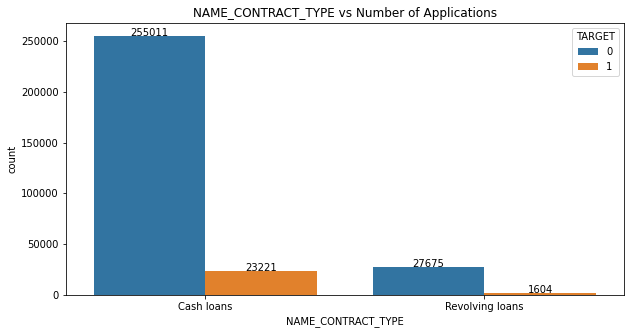

In [ ]:
# NAME_CONTRACT_TYPE
cat_univariate_analysis('NAME_CONTRACT_TYPE')

In [ ]:
#Client's with All other cases (Target=0)
#Out of 'All other cases', 90.21% have taken 'Cash Loans' and 9.79% have taken 'Revolving Loans'
#Client's with Payment Difficulties (Target=1)
#Out of all 'Client's with payment difficulties', 93.54% have taken 'Cash Loans' and 6.46% have taken 'Revolving Loans'

In [ ]:
# function for numerical variable univariate analysis

def num_univariate_analysis(column_name,scale='linear') : 
    # boxplot for column vs target
    plt.figure(figsize=(8,6))
    ax = sns.boxplot(x='TARGET', y = column_name, data = application_data)
    title = column_name+' vs Target'
    ax.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax.set(ylabel=column_name + '(Log Scale)')
    # summary statistic
    print('All Other Cases (TARGET : 0)')
    print(application_data0[column_name].describe(),'\n')
    print('Clients with Payment Difficulties (TARGET : 1)')
    print(application_data1[column_name].describe())


All Other Cases (TARGET : 0)
count     282,686.00
mean      602,648.28
std       406,845.91
min        45,000.00
25%       270,000.00
50%       517,788.00
75%       810,000.00
max     4,050,000.00
Name: AMT_CREDIT, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count      24,825.00
mean      557,778.53
std       346,433.24
min        45,000.00
25%       284,400.00
50%       497,520.00
75%       733,315.50
max     4,027,680.00
Name: AMT_CREDIT, dtype: float64


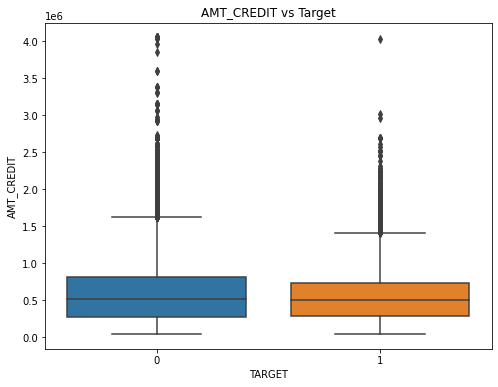

In [ ]:
# AMT_CREDIT 
num_univariate_analysis('AMT_CREDIT')

In [ ]:
#Amount of credit
#The median amount of credit taken by Clients having payment difficulties' is almost same as 'All other cases'.
#You could notice that the IQR of Target 1 is less than Target 0, which implies that more proportion of client's with payment difficulties take credit amounts centered around the median amount than 'All other cases'
#Comparing the outliers of Target 1 and 0, we could see that Clients with payment difficulties favour lower amount of credit than all other cases. Conversly, people with higher amount of credit have are more probably to fall in the category 'All other cases' than 'Clients with Payment Difficulties'


All Other Cases (TARGET : 0)
count   282,686.00
mean     27,163.53
std      14,658.00
min       1,615.50
25%      16,456.50
50%      24,876.00
75%      34,749.00
max     258,025.50
Name: AMT_ANNUITY, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count    24,825.00
mean     26,481.74
std      12,450.68
min       2,722.50
25%      17,361.00
50%      25,263.00
75%      32,976.00
max     149,211.00
Name: AMT_ANNUITY, dtype: float64


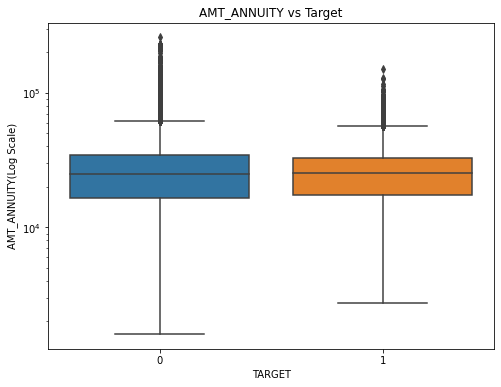

In [ ]:
#AMT_ANNUITY
num_univariate_analysis('AMT_ANNUITY','log')

In [ ]:
#Amount of Annuity
#There is not much difference in Amount of Annuity between Clients with Payment Difficulties and All other cases.
#The median and mean are around the same.
#However, Clients with Payment difficulties have annuity amounts which are less dispersed than All other cases.


All Other Cases (TARGET : 0)
count     282,686.00
mean      542,652.48
std       373,626.00
min        40,500.00
25%       238,500.00
50%       450,000.00
75%       685,002.38
max     4,050,000.00
Name: AMT_GOODS_PRICE, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count      24,825.00
mean      488,939.44
std       311,506.71
min        45,000.00
25%       238,500.00
50%       450,000.00
75%       675,000.00
max     3,600,000.00
Name: AMT_GOODS_PRICE, dtype: float64


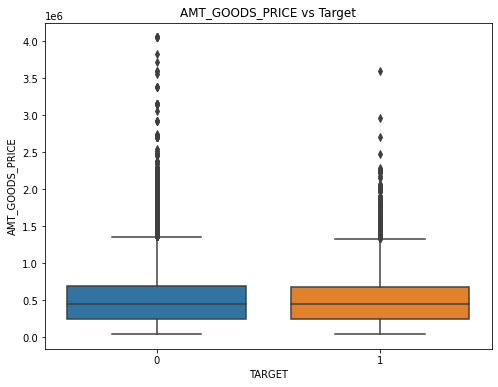

In [ ]:
#AMT_GOODS_PRICE
num_univariate_analysis('AMT_GOODS_PRICE')

In [ ]:
#Goods Price Amount
#With respect to AMT_GOODS_PRICE, there is no significant difference between Clients with Payment difficulties and All another Cases.


TARGET 0
 [1, 2, 3]
Categories (3, int64): [1, 2, 3] 

TARGET 1
 [2, 3, 1]
Categories (3, int64): [2, 3, 1] 

All Other Cases (TARGET : 0)
  REGION_RATING_CLIENT_W_CITY   count  percent  cumulative_count  \
0                           2  211314    74.75            211314   
1                           3   38859    13.75            250173   
2                           1   32513    11.50            282686   

   cumulative_percent  
0               74.75  
1               88.50  
2              100.00   

Clients with Payment Difficulties (TARGET : 1)
  REGION_RATING_CLIENT_W_CITY  count  percent  cumulative_count  \
0                           2  18170    73.19             18170   
1                           3   5001    20.15             23171   
2                           1   1654     6.66             24825   

   cumulative_percent  
0               73.19  
1               93.34  
2              100.00   



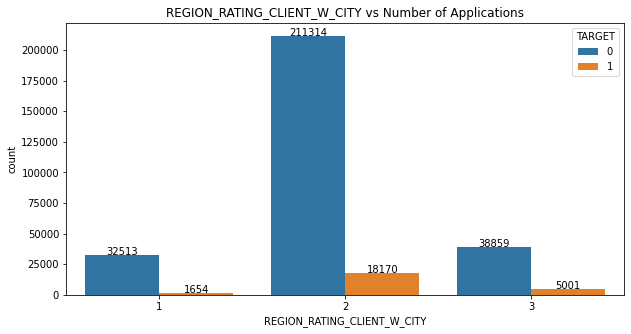

In [ ]:
#REGION_RATING_CLIENT_W_CITY
cat_univariate_analysis('REGION_RATING_CLIENT_W_CITY')

In [ ]:
#Bank City Rating
#The bank has rated cities into three categories [1,2,3]

#Among 'All other cases' , 74.7% belong to category 2 cities followed by 13.7% in category 3 cities and 11.5% in category 1 cities.
#73.1% of Clients with Payment difficulties belong to cities of category 2 followed by 20.1% belonging to category 3 and 6.6% in category 1
#One can see that there are higher cases of Payment Difficulties in category 2 cities (20.1%) compared to All other cases (13.7%). Also , there are less cases of Payment difficulties in city category 1 (6.6%) compared to All other cases (11.5%)

All Other Cases (TARGET : 0)
count   282,686.00
mean          0.52
std           0.19
min           0.00
25%           0.41
50%           0.57
75%           0.67
max           0.85
Name: EXT_SOURCE_2, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count   24,825.00
mean         0.41
std          0.21
min          0.00
25%          0.24
50%          0.44
75%          0.59
max          0.81
Name: EXT_SOURCE_2, dtype: float64


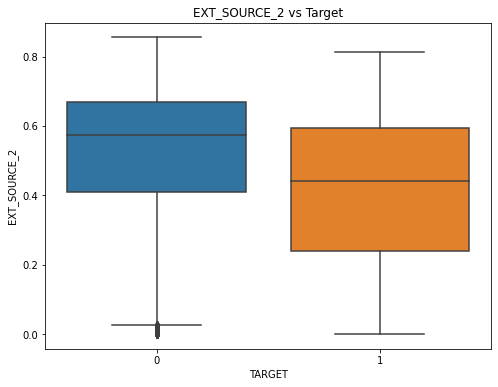

In [ ]:
#EXT_SOURCE_2
num_univariate_analysis('EXT_SOURCE_2')

In [ ]:
#Client Credit Rating By External Source - 2
#The median credit rating of clients with Payment difficulties (0.44) is less than those with all other cases (0.57)
#We can say that there is higher probability of client with less credit rating to have payment difficulties.
#Further, there are some outliers in 'All other cases'. These could be clients with no credit history and hence their credit ratings are marked as zero.


All Other Cases (TARGET : 0)
count   282,686.00
mean          0.52
std           0.17
min           0.00
25%           0.43
50%           0.51
75%           0.64
max           0.89
Name: EXT_SOURCE_3, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count   24,825.00
mean         0.42
std          0.19
min          0.00
25%          0.27
50%          0.48
75%          0.51
max          0.90
Name: EXT_SOURCE_3, dtype: float64


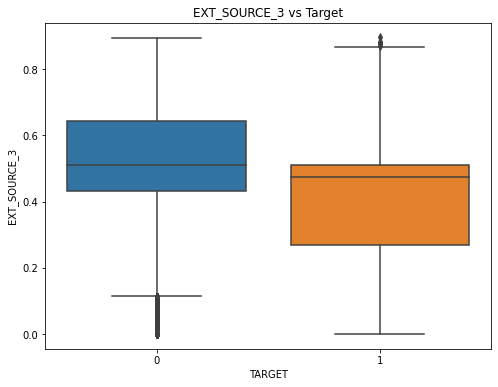

In [ ]:
#EXT_SOURCE_3
num_univariate_analysis('EXT_SOURCE_3')

In [ ]:
#Client Credit Rating By External Source - 3
#The median credit rating of clients with Payment difficulties (0.38) is less than those with all other cases (0.55)
#We can say that there is higher probability of client with less credit rating to have payment difficulties.

TARGET 0
 ['F', 'M', NaN]
Categories (2, object): ['F', 'M'] 

TARGET 1
 ['M', 'F']
Categories (2, object): ['M', 'F'] 

All Other Cases (TARGET : 0)
  CODE_GENDER   count  percent  cumulative_count  cumulative_percent
0           F  188278    66.60            188278               66.60
1           M   94404    33.40            282682              100.00 

Clients with Payment Difficulties (TARGET : 1)
  CODE_GENDER  count  percent  cumulative_count  cumulative_percent
0           F  14170    57.08             14170               57.08
1           M  10655    42.92             24825              100.00 



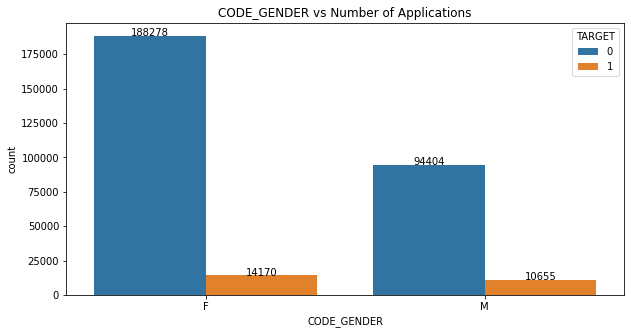

In [ ]:
#CODE_GENDER
cat_univariate_analysis('CODE_GENDER')

In [ ]:
print(application_data['CODE_GENDER'].value_counts(),'\n')
print('Proportion of Females (Target 0) :', round(100*188278/202448,2))
print('Proportion of Females (Target 1) :', round(100*14170/202448,2))

F    202448
M    105059
Name: CODE_GENDER, dtype: int64 

Proportion of Females (Target 0) : 93.0
Proportion of Females (Target 1) : 7.0


In [ ]:
print('Proportion of Males (Target 0) :', round(100*94404/105059,2))
print('Proportion of Males (Target 1) :', round(100*10655/105059,2))

Proportion of Males (Target 0) : 89.86
Proportion of Males (Target 1) : 10.14


In [ ]:
#Gender
#There are very high proportion of Female applicants (65.8%)
#Only 7% of total female applicants have payment difficulties compared to 10% of total male applications.
#It is possible that female applicants are safer borrowers than male.

In [ ]:
def cat_proportions(column_name) : 
    values = application_data[column_name].unique()
    values = values.to_numpy()
    values.tolist()
    data0 = application_data0[column_name].value_counts().to_dict()
    data1 = application_data1[column_name].value_counts().to_dict()
    data = application_data[column_name].value_counts().to_dict()
    

    for i in values : 
        if i in data0 and i in data1 and i in data : 
            print('Proportion of '+ str(i) + ' in Target 0 : ', round(data0[i]*100/data[i],2))
            print('Proportion of '+ str(i) + ' in Target 1 : ', round(data1[i]*100/data[i],2),'\n' )

TARGET 0
 ['N', 'Y']
Categories (2, object): ['N', 'Y'] 

TARGET 1
 ['N', 'Y']
Categories (2, object): ['N', 'Y'] 

All Other Cases (TARGET : 0)
  FLAG_OWN_CAR   count  percent  cumulative_count  cumulative_percent
0            N  185675    65.68            185675               65.68
1            Y   97011    34.32            282686              100.00 

Clients with Payment Difficulties (TARGET : 1)
  FLAG_OWN_CAR  count  percent  cumulative_count  cumulative_percent
0            N  17249    69.48             17249               69.48
1            Y   7576    30.52             24825              100.00 

Proportion of N in Target 0 :  91.5
Proportion of N in Target 1 :  8.5 

Proportion of Y in Target 0 :  92.76
Proportion of Y in Target 1 :  7.24 



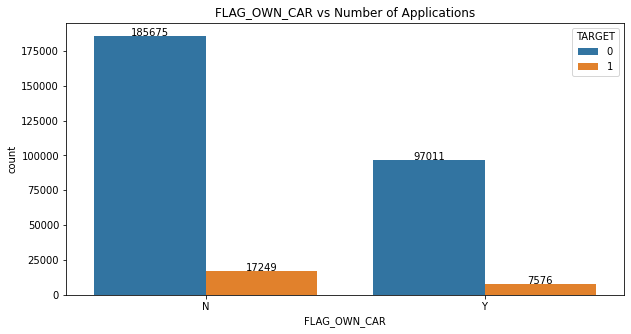

In [ ]:
# FLAG_OWN_CAR
cat_univariate_analysis('FLAG_OWN_CAR')
cat_proportions('FLAG_OWN_CAR')

In [ ]:
application_data['FLAG_OWN_CAR'].value_counts(normalize=True)

N   0.66
Y   0.34
Name: FLAG_OWN_CAR, dtype: float64

In [ ]:
#Owning A Car
#34% of total customers own a car
#Among customers who own a car, 92.76% belong to 'All other cases' category and 7.24% have payment difficulties.
#Among customers with Payment difficulties, 30.5% own a car

#In 'All Other Cases', 34.3% own a car

#ustomers having cars lower probability of having Payment Difficulties.

#Customers owning cars in 'Clients with Payment difficulties ' : 8.5%
#Customers owning cars in 'Clients with Payment difficulties ' 7.24

TARGET 0
 ['N', 'Y']
Categories (2, object): ['N', 'Y'] 

TARGET 1
 ['Y', 'N']
Categories (2, object): ['Y', 'N'] 

All Other Cases (TARGET : 0)
  FLAG_OWN_REALTY   count  percent  cumulative_count  cumulative_percent
0               Y  196329    69.45            196329               69.45
1               N   86357    30.55            282686              100.00 

Clients with Payment Difficulties (TARGET : 1)
  FLAG_OWN_REALTY  count  percent  cumulative_count  cumulative_percent
0               Y  16983    68.41             16983               68.41
1               N   7842    31.59             24825              100.00 

Proportion of Y in Target 0 :  92.04
Proportion of Y in Target 1 :  7.96 

Proportion of N in Target 0 :  91.68
Proportion of N in Target 1 :  8.32 



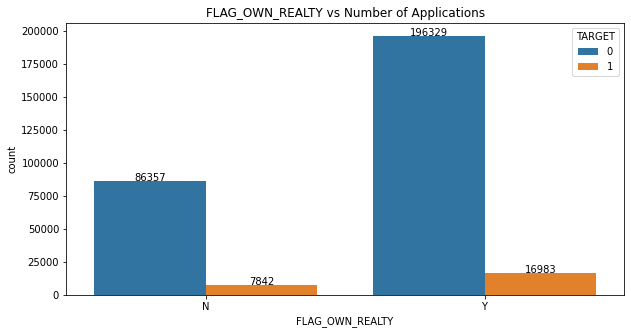

In [ ]:
# FLAG_OWN_REALTY
cat_univariate_analysis('FLAG_OWN_REALTY')
cat_proportions('FLAG_OWN_REALTY')

In [ ]:
#Owning Realty
#In Overall population of clients, 69.36% of people own real estate.
#In that group of people owning the real estate, 7.96% of people are having payment difficulties and the rest 92.04% belong to 'other cases'.
#In Overall population of clients, 30.63% of people do not own Realestate.
#In that group of people not owning the real estate, 8.32% of people are having payment difficulties and the rest 91.68% belong to 'other cases'.
#On closer comparision of above observations, we can infer that people who do not own Real-estate seem more likely to face payment difficulties than compared to the group of people owning the Real-estate.

TARGET 0
 ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
Categories (5, object): ['Higher education', 'Secondary / secondary special', 'Incomplete higher',
                         'Lower secondary', 'Academic degree'] 

TARGET 1
 ['Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Lower secondary', 'Academic degree']
Categories (5, object): ['Secondary / secondary special', 'Incomplete higher', 'Higher education', 'Lower secondary',
                         'Academic degree'] 

All Other Cases (TARGET : 0)
             NAME_EDUCATION_TYPE   count  percent  cumulative_count  \
0  Secondary / secondary special  198867    70.35            198867   
1               Higher education   70854    25.06            269721   
2              Incomplete higher    9405     3.33            279126   
3                Lower secondary    3399     1.20            282525   
4                Academic degree     161  

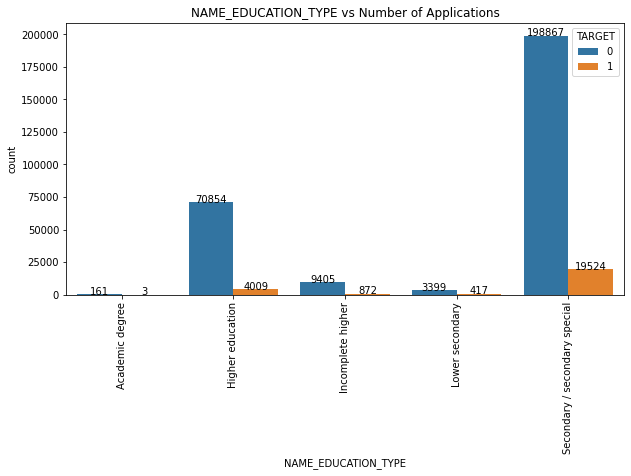

In [ ]:
#NAME_EDUCATION_TYPE

cat_univariate_analysis('NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
cat_proportions('NAME_EDUCATION_TYPE')

### Highest Education
1.24% of the applicants are having education type of 'Lower secondary'
Out of that 1.24%, 10.93% of them are likely to face Payment difficulties.
71% of the applicants are having education type of 'Secodary/seconday special' .
Out of that 71%, 8.93% of them are likely to face Payment difficulties.
3.34% of the applicants are having education type of 'Incomplete higher'.
Out of that 3.34%, 8.48% of them are likely to face Payment difficulties.
24.34% of the applicants are having education type of 'Higher education'.
Out of that 24.34%, 5.36% of them are likely to face Payment difficulties.
0.05% of the applicants are having education type of 'Academic degree'.
Out of that 0.05%, 1.83% of them are likely to face Payment difficulties.
We can clearly infer from the above observations that higher the education, lesser is the risk of payment difficulties.

TARGET 0
 ['Married', 'Single / not married', 'Civil marriage', 'Widow', 'Separated', NaN]
Categories (5, object): ['Married', 'Single / not married', 'Civil marriage', 'Widow',
                         'Separated'] 

TARGET 1
 ['Single / not married', 'Widow', 'Married', 'Civil marriage', 'Separated']
Categories (5, object): ['Single / not married', 'Widow', 'Married', 'Civil marriage', 'Separated'] 

All Other Cases (TARGET : 0)
     NAME_FAMILY_STATUS   count  percent  cumulative_count  cumulative_percent
0               Married  181582    64.23            181582               64.23
1  Single / not married   40987    14.50            222569               78.73
2        Civil marriage   26814     9.49            249383               88.22
3             Separated   18150     6.42            267533               94.64
4                 Widow   15151     5.36            282684              100.00 

Clients with Payment Difficulties (TARGET : 1)
     NAME_FAMILY_STATUS  count  percent  c

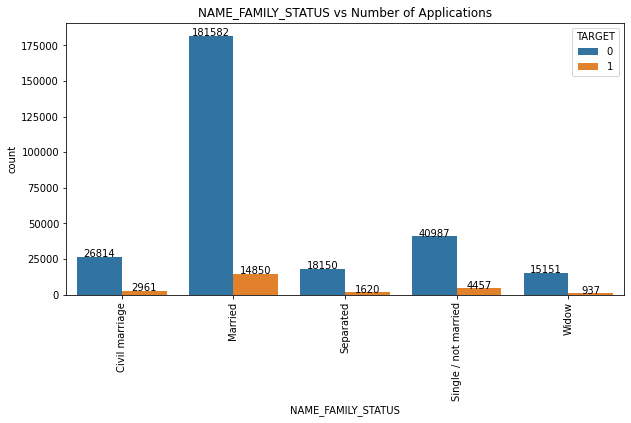

In [ ]:
#NAME_FAMILY_STATUS

cat_univariate_analysis('NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
cat_proportions('NAME_FAMILY_STATUS')

### Marital Status
5.2% of applicants have their family status as'Widow'
Out of that 5.2%, 5.82% of them are likely to face Payment difficulties.
63.87% of applicants have their family status as'Married'
Out of that 63.87%, 7.56% of them are likely to face Payment difficulties.
6.42% of applicants have their family status as'Seperated'
Out of that 6.42%, 8.19% of them are likely to face Payment difficulties.
14.77% of applicants have their family status as'Single / not married'
Out of that 14.77%, 9.81% of them are likely to face Payment difficulties.
9.68% of applicants have their family status as'Civil marriage'
Out of that 9.68%, 9.94% of them are likely to face Payment difficulties.
Based on the above obervations, we can infer that the applicants with NAME_FAMILY_STATUS as seperated or single or have higher risk of payment difficulties compared to that of Widow and Married.

For the purpose of this analysis, civil marriage and married are treated equal. They might be merged into the one category

TARGET 0
 ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
Categories (6, object): ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment',
                         'Office apartment', 'Co-op apartment'] 

TARGET 1
 ['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
Categories (6, object): ['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment',
                         'Office apartment', 'Co-op apartment'] 

All Other Cases (TARGET : 0)
     NAME_HOUSING_TYPE   count  percent  cumulative_count  cumulative_percent
0    House / apartment  251596    89.00            251596               89.00
1         With parents   13104     4.64            264700               93.64
2  Municipal apartment   10228     3.62            274928               97.26
3     Rented apartment    4280     1.51            279208

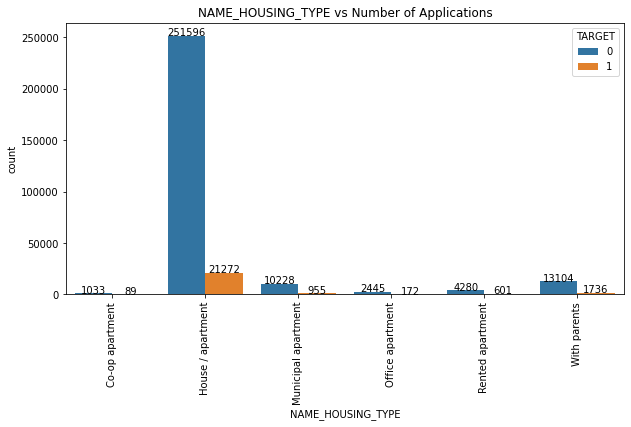

In [ ]:
#NAME_HOUSING_TYPE
cat_univariate_analysis('NAME_HOUSING_TYPE',figsize=(10,5))
plt.xticks(rotation=90)
cat_proportions('NAME_HOUSING_TYPE')

### Housing Type
0.85% of applicants have their housing type as'Office apartment'
Out of that 0.85%, 6.57% of them are likely to face Payment difficulties.
88.73% of applicants have their housing type as'House/ apartment'
Out of that 88.73%, 7.8% of them are likely to face Payment difficulties.
0.36% of applicants have their housing type as'Co-op apartment'
Out of that 0.36%, 7.93% of them are likely to face Payment difficulties.
3.63% of applicants have their housing type as'Municipal apartment'
Out of that 3.63%, 8.54% of them are likely to face Payment difficulties.
4.82% of applicants have their housing type as'with parents'
Out of that 4.82%, 11.7% of them are likely to face Payment difficulties.
1.58% of applicants have their housing type as'Rented apartment'
Out of that 1.58%, 12.31% of them are likely to face Payment difficulties.
Based on the above obervations, we can infer that the applicants with NAME_HOUSING_TYPE as 'Municipal apartment' or 'with parents' or 'Rented apartment ' have higher risk of payment difficulties compared to that of other housing types.

TARGET 0
 ['250000-275000', '50000-75000', '125000-150000', '100000-125000', '75000-100000', ..., '325000-350000', '375000-400000', '400000-425000', '450000-475000', '475000-500000']
Length: 20
Categories (20, object): ['25000-50000' < '50000-75000' < '75000-100000' < '100000-125000' < ... <
                          '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above'] 

TARGET 1
 ['200000-225000', '100000-125000', '125000-150000', '75000-100000', '300000-325000', ..., '225000-250000', '375000-400000', '325000-350000', '450000-475000', '475000-500000']
Length: 20
Categories (20, object): ['25000-50000' < '50000-75000' < '75000-100000' < '100000-125000' < ... <
                          '425000-450000' < '450000-475000' < '475000-500000' < '500000 and above'] 

All Other Cases (TARGET : 0)
      AMT_INCOME_CAT  count  percent  cumulative_count  cumulative_percent
0      125000-150000  43837    15.51             43837               15.51
1      100000-125000  39860  

posx and posy should be finite values
posx and posy should be finite values


Proportion of 200000-225000 in Target 0 :  92.15
Proportion of 200000-225000 in Target 1 :  7.85 

Proportion of 250000-275000 in Target 0 :  93.03
Proportion of 250000-275000 in Target 1 :  6.97 

Proportion of 50000-75000 in Target 0 :  92.12
Proportion of 50000-75000 in Target 1 :  7.88 

Proportion of 125000-150000 in Target 0 :  91.54
Proportion of 125000-150000 in Target 1 :  8.46 

Proportion of 100000-125000 in Target 0 :  91.21
Proportion of 100000-125000 in Target 1 :  8.79 

Proportion of 75000-100000 in Target 0 :  91.57
Proportion of 75000-100000 in Target 1 :  8.43 

Proportion of 150000-175000 in Target 0 :  91.41
Proportion of 150000-175000 in Target 1 :  8.59 

Proportion of 350000-375000 in Target 0 :  94.38
Proportion of 350000-375000 in Target 1 :  5.62 

Proportion of 25000-50000 in Target 0 :  92.41
Proportion of 25000-50000 in Target 1 :  7.59 

Proportion of 175000-200000 in Target 0 :  91.72
Proportion of 175000-200000 in Target 1 :  8.28 

Proportion of 425000

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


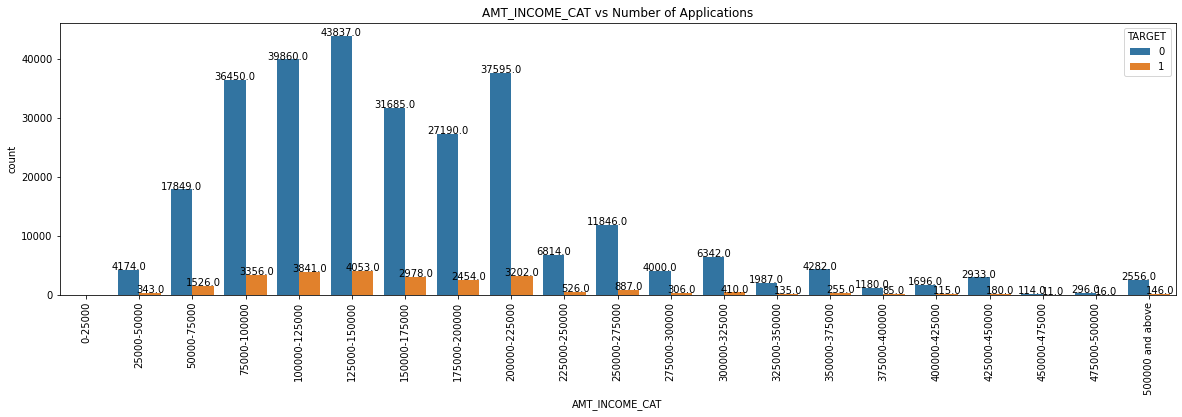

In [ ]:
#AMT_INCOME_CAT
cat_univariate_analysis('AMT_INCOME_CAT',figsize=(20,5))
plt.xticks(rotation=90)
cat_proportions('AMT_INCOME_CAT')

In [ ]:
# We will calculate the pecentage of "Clients with Payment difficulties" for every income category.
t0=application_data0['AMT_INCOME_CAT'].value_counts()
t1=application_data1['AMT_INCOME_CAT'].value_counts()
prop = 100*t1/(t1+t0)
print(pd.DataFrame(prop))

                  AMT_INCOME_CAT
0-25000                      nan
25000-50000                 7.59
50000-75000                 7.88
75000-100000                8.43
100000-125000               8.79
125000-150000               8.46
150000-175000               8.59
175000-200000               8.28
200000-225000               7.85
225000-250000               7.17
250000-275000               6.97
275000-300000               7.11
300000-325000               6.07
325000-350000               6.36
350000-375000               5.62
375000-400000               6.72
400000-425000               6.35
425000-450000               5.78
450000-475000               8.80
475000-500000               5.13
500000 and above            5.40


# Income Category
By the above table of 'AMT_INCOME_CAT' vs 'percentage of customers with payment difficulties' in that range, we can infer that as the income increases, applicant is less likely to face payment difficulties(except in exceptional cases, such as 450000 - 475000).

In [ ]:
#CNT_CHILDREN
#Lets convert this into a categorical variable
application_data['CNT_CHILDREN']=application_data['CNT_CHILDREN'].astype('category')
application_data0['CNT_CHILDREN']=application_data0['CNT_CHILDREN'].astype('category')
application_data1['CNT_CHILDREN']=application_data1['CNT_CHILDREN'].astype('category')

TARGET 0
 [0, 1, 2, 3, 4, ..., 8, 12, 10, 19, 14]
Length: 13
Categories (13, int64): [0, 1, 2, 3, ..., 12, 10, 19, 14] 

TARGET 1
 [0, 1, 3, 2, 4, 5, 9, 11, 6]
Categories (9, int64): [0, 1, 3, 2, ..., 5, 9, 11, 6] 

All Other Cases (TARGET : 0)
   CNT_CHILDREN   count  percent  cumulative_count  cumulative_percent
0             0  198762    70.31            198762               70.31
1             1   55665    19.69            254427               90.00
2             2   24416     8.64            278843               98.64
3             3    3359     1.19            282202               99.83
4             4     374     0.13            282576               99.96
5             5      77     0.03            282653               99.99
6             6      15     0.01            282668               99.99
7             7       7     0.00            282675              100.00
8            14       3     0.00            282678              100.00
9            19       2     0.00            2

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


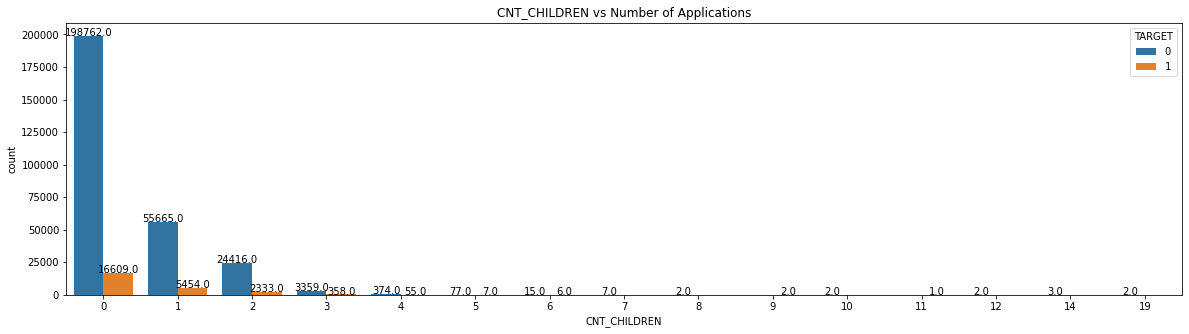

In [ ]:
#CNT_CHILDREN
cat_univariate_analysis('CNT_CHILDREN',figsize=(20,5))
column_name='CNT_CHILDREN'
cat_proportions('CNT_CHILDREN')

In [ ]:
# Calculating the pecentage of "Clients with Payment difficulties" for every income category.
t0=application_data0['CNT_CHILDREN'].value_counts()
t1=application_data1['CNT_CHILDREN'].value_counts()
prop = 100*t1/(t1+t0)

print(pd.DataFrame(prop))

    CNT_CHILDREN
0           7.71
1           8.92
2           8.72
3           9.63
4          12.82
5           8.33
6          28.57
7            nan
8            nan
9            nan
10           nan
11           nan
12           nan
14           nan
19           nan


### Number of Children
By looking at the plot and above table, we can clearly infer that starting from 0 to 6, applicants having 0 children have lowest risk of facing payment dificulties. With the increase in number of children, the risk of payment difficulties also increase.
Above 6, there might be some data quality issues. We can even expect that this is error while taking the data from thr applicants, because the numericals above 6 are not practical in most of the cases.
If the CNT_CHILDREN > 6 is true, then there is 0 probabilty that the applicant might face the payment difficulties.

TARGET 0
 [ 2.  1.  3.  4.  5.  6.  9.  7.  8. 10. 14. 12. 20. 15. 16.] 

TARGET 1
 [ 1.  2.  5.  3.  4.  6.  7. 10. 13.  8. 11.] 



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


All Other Cases (TARGET : 0)
    CNT_FAM_MEMBERS   count  percent  cumulative_count  cumulative_percent
0              2.00  146350    51.77            146350               51.77
1              1.00   62172    21.99            208522               73.76
2              3.00   47993    16.98            256515               90.74
3              4.00   22561     7.98            279076               98.72
4              5.00    3151     1.11            282227               99.84
5              6.00     353     0.12            282580               99.96
6              7.00      75     0.03            282655               99.99
7              8.00      14     0.00            282669               99.99
8              9.00       6     0.00            282675              100.00
9             20.00       2     0.00            282677              100.00
10            16.00       2     0.00            282679              100.00
11            14.00       2     0.00            282681              100

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


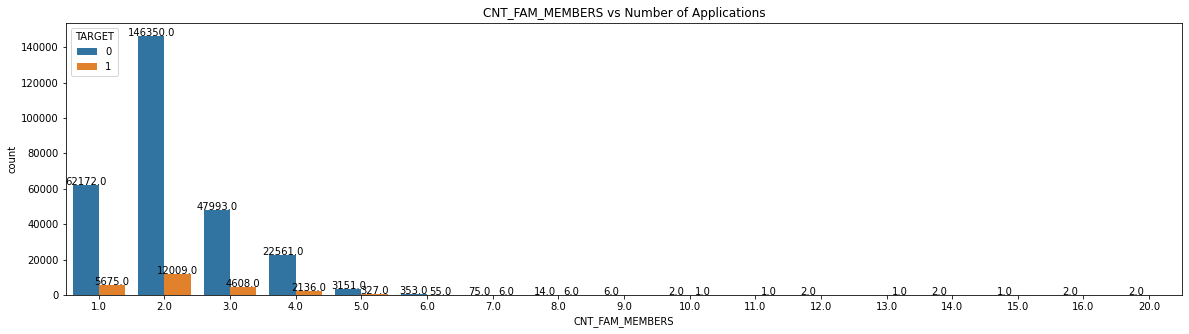

In [ ]:
#CNT_FAM_MEMBERS
cat_univariate_analysis('CNT_FAM_MEMBERS',figsize=(20,5))


### Number of Family members
When we look at the plot and proportions above, we can clearly infer that increase in family members is directly proportional to increase in risk of facing payment difficulties.
Above 6, we cant infer because there were not enough applicant samples

All Other Cases (TARGET : 0)
count   282,686.00
mean     69,668.81
std     140,983.36
min           0.00
25%         967.00
50%       2,304.00
75%       6,074.00
max     365,243.00
Name: DAYS_EMPLOYED, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count    24,825.00
mean     45,587.32
std     118,303.30
min           0.00
25%         677.00
50%       1,458.00
75%       3,280.00
max     365,243.00
Name: DAYS_EMPLOYED, dtype: float64


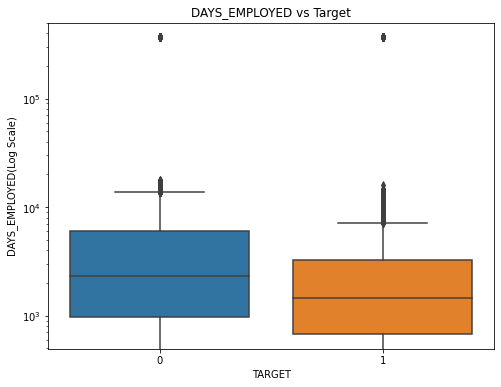

In [ ]:
#DAYS_EMPLOYED.
num_univariate_analysis('DAYS_EMPLOYED','log')

### Number of Days Employed
If we observe the above box plot, we can clearly notice the outliers, so lets concentrate on median.
The applicants with payment difficulties have lesser median and IQR compared to "all other cases". So, greater the DAYS_EMPLOYED, lesser is the risk of payment difficulties.

TARGET 0
 ['State servant', 'Working', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Categories (8, object): ['State servant', 'Working', 'Commercial associate', 'Pensioner', 'Unemployed',
                         'Student', 'Businessman', 'Maternity leave'] 

TARGET 1
 ['Working', 'Commercial associate', 'Pensioner', 'State servant', 'Unemployed', 'Maternity leave']
Categories (6, object): ['Working', 'Commercial associate', 'Pensioner', 'State servant',
                         'Unemployed', 'Maternity leave'] 

All Other Cases (TARGET : 0)
       NAME_INCOME_TYPE   count  percent  cumulative_count  cumulative_percent
0               Working  143550    50.78            143550               50.78
1  Commercial associate   66257    23.44            209807               74.22
2             Pensioner   52380    18.53            262187               92.75
3         State servant   20454     7.24            282641               99.98
4     

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


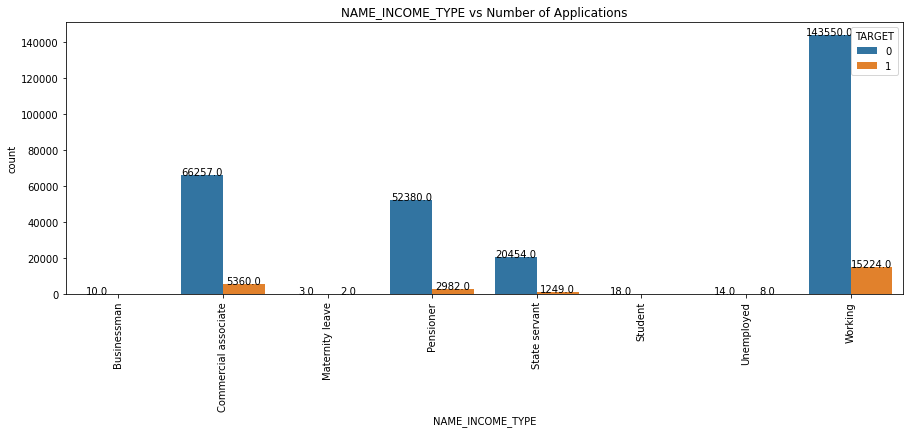

In [ ]:
#NAME_INCOME_TYPE
cat_univariate_analysis('NAME_INCOME_TYPE',figsize=(15,5))
plt.xticks(rotation=90)
cat_proportions('NAME_INCOME_TYPE')

Income type
52% of applicants have their NAME_INCOME_TYPE as'Working'.
Out of that 52%, 9.59% of them are likely to face Payment difficulties.
23% of applicants have their NAME_INCOME_TYPE as'Commercial associate'
Out of that 23%, 7.48% of them are likely to face Payment difficulties.
7% of applicants have their NAME_INCOME_TYPE as'State servant'
Out of that 7%, 5.75% of them are likely to face Payment difficulties.
18% of applicants have their NAME_INCOME_TYPE as'Pensioner'
Out of that 18%, 5.39% of them are likely to face Payment difficulties.
From the above Graph and proportions, we can infer that Pensioners and state servants have lower risk of facing payment difficulties compared to the Working and Commercial associates.

Unemployed,Student,Businessman and Maternity leave cannot be inferred because of the reason that they are not well populated

All Other Cases (TARGET : 0)
count   282,686.00
mean        976.38
std         831.21
min           0.00
25%         281.00
50%         776.00
75%       1,586.00
max       4,292.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64 

Clients with Payment Difficulties (TARGET : 1)
count   24,825.00
mean       808.80
std        758.09
min          0.00
25%        194.00
50%        594.00
75%      1,301.00
max      4,070.00
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


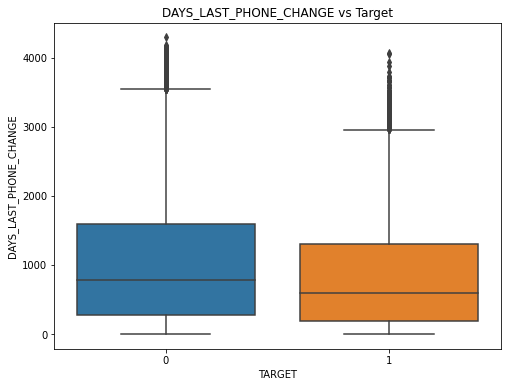

In [ ]:
#DAYS_LAST_PHONE_CHANGE
application_data['DAYS_LAST_PHONE_CHANGE'] = np.abs(application_data['DAYS_LAST_PHONE_CHANGE'])
application_data0['DAYS_LAST_PHONE_CHANGE'] = np.abs(application_data0['DAYS_LAST_PHONE_CHANGE'])
application_data1['DAYS_LAST_PHONE_CHANGE'] = np.abs(application_data1['DAYS_LAST_PHONE_CHANGE'])
num_univariate_analysis('DAYS_LAST_PHONE_CHANGE')

Days Since Phone Number Was Changed.
From the above boxplot, we can clearly notice that the median for 'all other cases' is 776 days and the median for 'Clients with payment difficulties' is 594 days.
By this, we can clearly infer that,lesser the days since last phone change, greater is the risk of payment difficulties

TARGET 0
 [1, 0]
Categories (2, int64): [1, 0] 

TARGET 1
 [1, 0]
Categories (2, int64): [1, 0] 

All Other Cases (TARGET : 0)
  FLAG_CONT_MOBILE   count  percent  cumulative_count  cumulative_percent
0                1  282157    99.81            282157               99.81
1                0     529     0.19            282686              100.00 

Clients with Payment Difficulties (TARGET : 1)
  FLAG_CONT_MOBILE  count  percent  cumulative_count  cumulative_percent
0                1  24780    99.82             24780               99.82
1                0     45     0.18             24825              100.00 

Proportion of 1 in Target 0 :  91.93
Proportion of 1 in Target 1 :  8.07 

Proportion of 0 in Target 0 :  92.16
Proportion of 0 in Target 1 :  7.84 



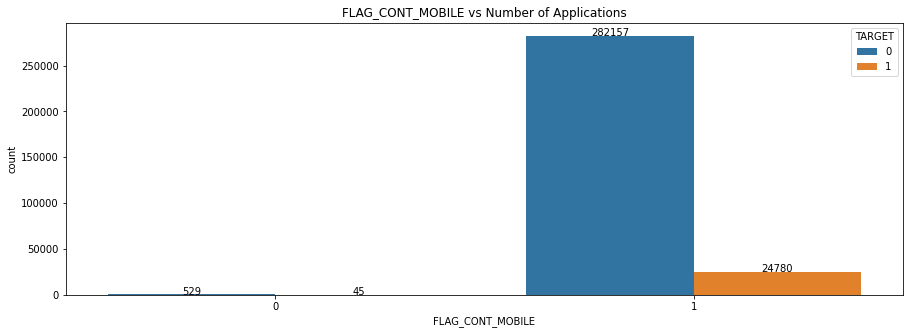

In [ ]:
#FLAG_CONT_MOBILE
cat_univariate_analysis('FLAG_CONT_MOBILE',figsize=(15,5))
cat_proportions('FLAG_CONT_MOBILE')

### Flag Whether Mobile Phone Was Reachable
From the above plot, we can observe that 0.18% applicants mobile numbers were not reachable.
From the people whose mobiles numbers were reachable, 8.07% of them are likely to face Payment difficulties, whereas the people whose mobile numbers were'nt reachable, 7.84% of them are likely to face Payment difficulties.
From these we cannot infer a relationship between FLAG_CONT_MOBILE and TARGET variable.

TARGET 0
 [0, 1]
Categories (2, int64): [0, 1] 

TARGET 1
 [0, 1]
Categories (2, int64): [0, 1] 

All Other Cases (TARGET : 0)
  FLAG_EMAIL   count  percent  cumulative_count  cumulative_percent
0          0  266618    94.32            266618               94.32
1          1   16068     5.68            282686              100.00 

Clients with Payment Difficulties (TARGET : 1)
  FLAG_EMAIL  count  percent  cumulative_count  cumulative_percent
0          0  23451    94.47             23451               94.47
1          1   1374     5.53             24825              100.00 

Proportion of 0 in Target 0 :  91.92
Proportion of 0 in Target 1 :  8.08 

Proportion of 1 in Target 0 :  92.12
Proportion of 1 in Target 1 :  7.88 



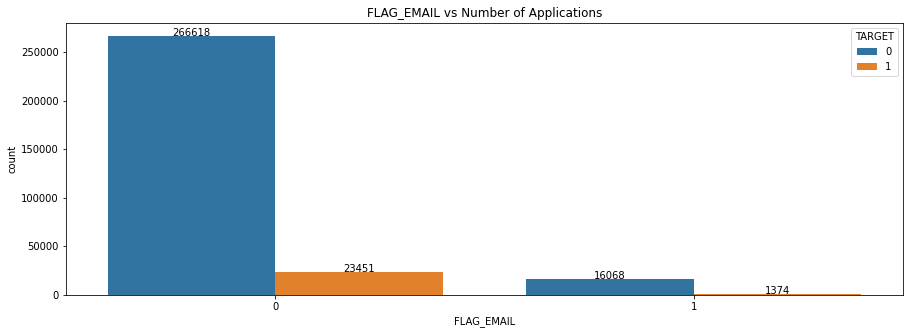

In [ ]:
#FLAG_EMAIL.
cat_univariate_analysis('FLAG_EMAIL',figsize=(15,5))
cat_proportions('FLAG_EMAIL')

### Whether E-mail Was Provided
From the above plot and proportions, we can clearly see that 94.3% of applicants have not given the E-mail address.
Out of 94.3%, 8.08% are likely to have payment difficulties.
From the above plot and proportions, we can clearly see that 5.7% of applicants have provided the E-mail address.
Out of 5.7%, 7.88% are likely to have paymenr difficulties.
From these we cannot infer a relationship between FLAG_EMAIL and TARGET variable because they stand in similar grounds.

posx and posy should be finite values
posx and posy should be finite values


TARGET 0
 [1, 0]
Categories (2, int64): [1, 0] 

TARGET 1
 [1]
Categories (1, int64): [1] 

All Other Cases (TARGET : 0)
  FLAG_MOBIL   count  percent  cumulative_count  cumulative_percent
0          1  282685   100.00            282685              100.00
1          0       1     0.00            282686              100.00 

Clients with Payment Difficulties (TARGET : 1)
  FLAG_MOBIL  count  percent  cumulative_count  cumulative_percent
0          1  24825   100.00             24825              100.00 

Proportion of 1 in Target 0 :  91.93
Proportion of 1 in Target 1 :  8.07 

Proportion of 0 in Target 0 :  100.0
Proportion of 0 in Target 1 :  0.0 



posx and posy should be finite values


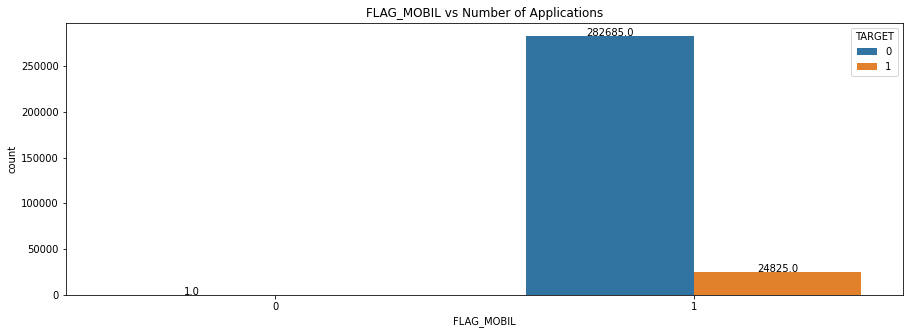

In [ ]:
#FLAG_MOBIL
cat_univariate_analysis('FLAG_MOBIL',figsize=(15,5))
cat_proportions('FLAG_MOBIL')

### Mobile Number
99.9% of them have given their mobile numbers. Out of those 99%, 8.07% have payment difficulties.
There is only one applicant who failed to provide the mobile number, since this number is small and negligible, we cannot infer using this data.

TARGET 0
 [0, 1]
Categories (2, int64): [0, 1] 

TARGET 1
 [0, 1]
Categories (2, int64): [0, 1] 

All Other Cases (TARGET : 0)
  LIVE_CITY_NOT_WORK_CITY   count  percent  cumulative_count  \
0                       0  232974    82.41            232974   
1                       1   49712    17.59            282686   

   cumulative_percent  
0               82.41  
1              100.00   

Clients with Payment Difficulties (TARGET : 1)
  LIVE_CITY_NOT_WORK_CITY  count  percent  cumulative_count  \
0                       0  19322    77.83             19322   
1                       1   5503    22.17             24825   

   cumulative_percent  
0               77.83  
1              100.00   

Proportion of 0 in Target 0 :  92.34
Proportion of 0 in Target 1 :  7.66 

Proportion of 1 in Target 0 :  90.03
Proportion of 1 in Target 1 :  9.97 



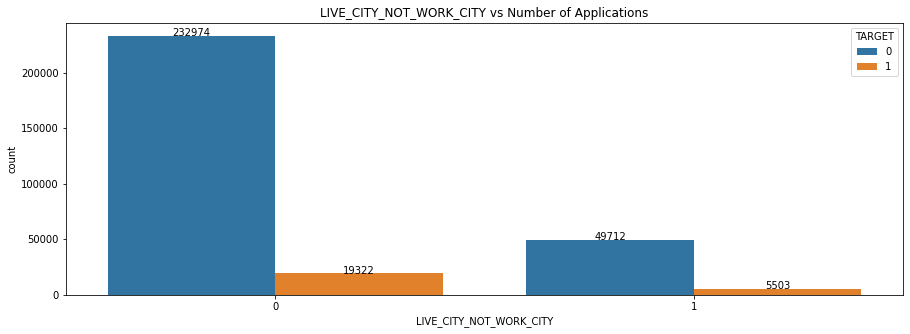

In [ ]:
#LIVE_CITY_NOT_WORK_CITY
cat_univariate_analysis('LIVE_CITY_NOT_WORK_CITY',figsize=(15,5))
cat_proportions('LIVE_CITY_NOT_WORK_CITY')

### Contact Address vs Work Address
From the above plot and proportions, we can clearly notice that 82% of them live and work in same city.
Out of that 82%, 7.66% of applicants likely to have payment difficulties.
From the above plot and proportions, we can clearly notice that 17% of them donot live and work in same city.
Out of that 17%, 9.97% of applicants have payment difficulties.
By this, we can clearly infer that, applicants that live and work in same city are at less risk of payment difficulties.

TARGET 0
 [0, 1]
Categories (2, int64): [0, 1] 

TARGET 1
 [0, 1]
Categories (2, int64): [0, 1] 

All Other Cases (TARGET : 0)
  REG_CITY_NOT_LIVE_CITY   count  percent  cumulative_count  \
0                      0  261586    92.54            261586   
1                      1   21100     7.46            282686   

   cumulative_percent  
0               92.54  
1              100.00   

Clients with Payment Difficulties (TARGET : 1)
  REG_CITY_NOT_LIVE_CITY  count  percent  cumulative_count  cumulative_percent
0                      0  21886    88.16             21886               88.16
1                      1   2939    11.84             24825              100.00 

Proportion of 0 in Target 0 :  92.28
Proportion of 0 in Target 1 :  7.72 

Proportion of 1 in Target 0 :  87.77
Proportion of 1 in Target 1 :  12.23 



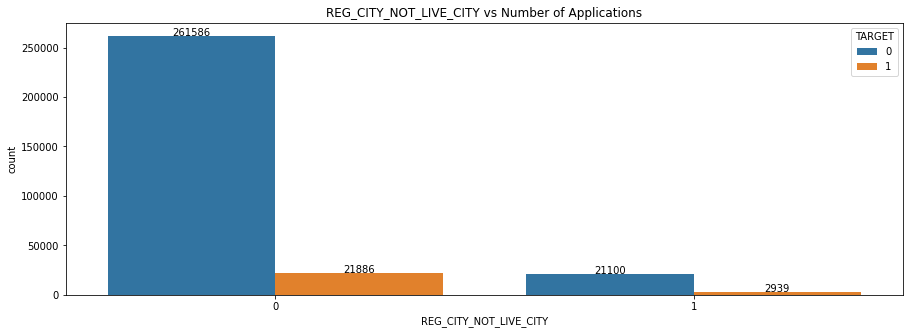

In [ ]:
#REG_CITY_NOT_LIVE_CITY.
cat_univariate_analysis('REG_CITY_NOT_LIVE_CITY',figsize=(15,5))
cat_proportions('REG_CITY_NOT_LIVE_CITY')

### Permanent Address vs Contact Address
From the above plot and proportions,92% of the applicant's permanent and contact address are same.
Out of that 92%, 7.72% of applicants likely to have payment difficulties.
From the above plot and proportions, 8% of the applicant's permanent and contact address are not same.
Out of that 8%, 12.23% of applicants likely to have payment difficulties.
By this, we can infer that, applicants that same permanent and contact address are likely to have less risk of payment difficulties.

#REG_CITY_NOT_WORK_CITY.

TARGET 0
 [0, 1]
Categories (2, int64): [0, 1] 

TARGET 1
 [0, 1]
Categories (2, int64): [0, 1] 

All Other Cases (TARGET : 0)
  REG_CITY_NOT_WORK_CITY   count  percent  cumulative_count  \
0                      0  219339    77.59            219339   
1                      1   63347    22.41            282686   

   cumulative_percent  
0               77.59  
1              100.00   

Clients with Payment Difficulties (TARGET : 1)
  REG_CITY_NOT_WORK_CITY  count  percent  cumulative_count  cumulative_percent
0                      0  17305    69.71             17305               69.71
1                      1   7520    30.29             24825              100.00 

Proportion of 0 in Target 0 :  92.69
Proportion of 0 in Target 1 :  7.31 

Proportion of 1 in Target 0 :  89.39
Proportion of 1 in Target 1 :  10.61 



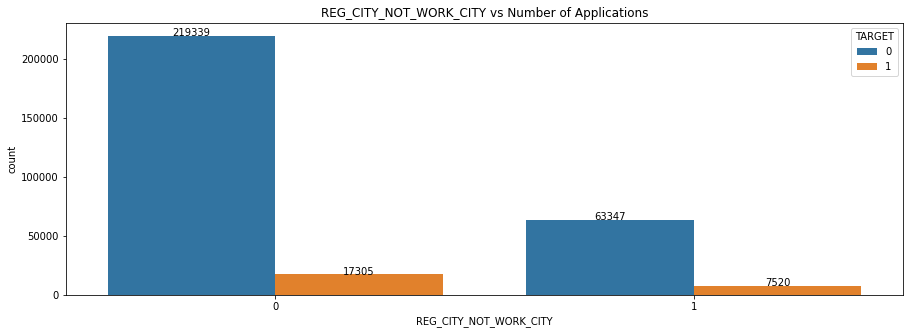

In [ ]:
#REG_CITY_NOT_WORK_CITY.
cat_univariate_analysis('REG_CITY_NOT_WORK_CITY',figsize=(15,5))
cat_proportions('REG_CITY_NOT_WORK_CITY')

Permanent Address vs Work Address
From the above plot and proportions, we can notice that 77% of applicants permanent address and work address are same. Coming to other side, 23% of applicants permanent address and work address are not same.

Looking at the proportions of "Clients with payment difficulties" on both sides, we can infer that the applicants whose permanent adress and work adress matches are less likely to have payment difficulties.



## Bivariate Analysis


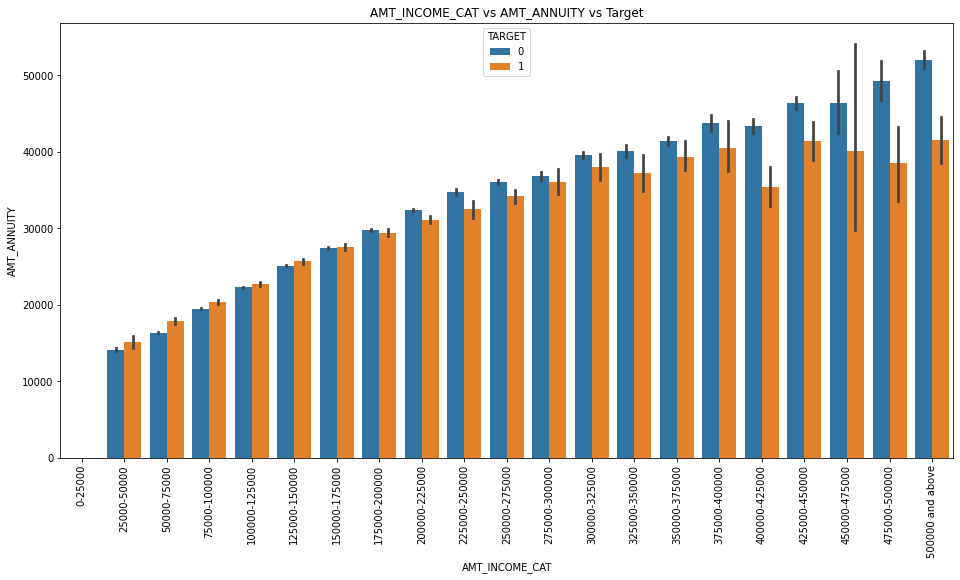

In [ ]:
#AMT_ANNUITY, AMT_INCOME_TOTAL vs TARGET
column_names = ['AMT_INCOME_CAT','AMT_ANNUITY']
plt.figure(figsize=(16,8))
sns.barplot(x = column_names[0],y = column_names[1],hue='TARGET',data = application_data)
plt.title(column_names[0] + ' vs '+ column_names[1] + ' vs Target')
plt.xticks(rotation=90);

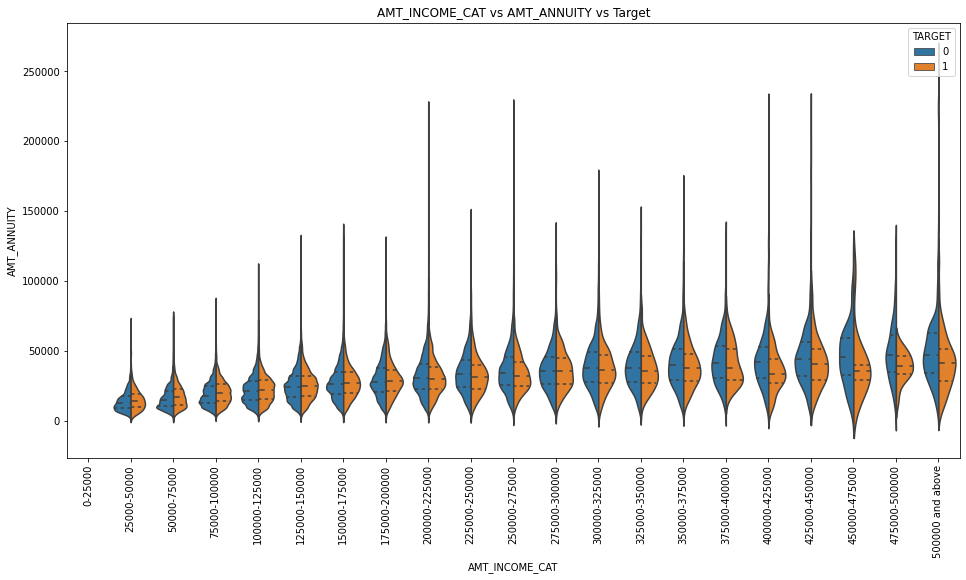

In [ ]:
plt.figure(figsize=(16,8))
# sns.catplot(x = column_names[0],y =column_names[1],hue='TARGET',data = application_data, kind='violin',height=8,aspect=4);
sns.violinplot(x = 'AMT_INCOME_CAT',y='AMT_ANNUITY',hue='TARGET',data = application_data,split=True, inner="quartile")
plt.title(column_names[0] + ' vs '+ column_names[1] + ' vs Target')
plt.xticks(rotation=90);

### Income and Annuity
Both plots show a gradual increase in the amount of annuity with increase in income.
Also, as the income increases there are higher number of outliers i.e the propensity to take on very high annuities compared to most customers in the same income range.
It can be seen that in low income ranges, the median no of "Clients with Payment difficulties' is slightly higher.
And the in high income ranges,the median no of "Clients with Payment difficulties' is slightly lower.
Income Range and Annuity have a mild correlation with Payment difficulties

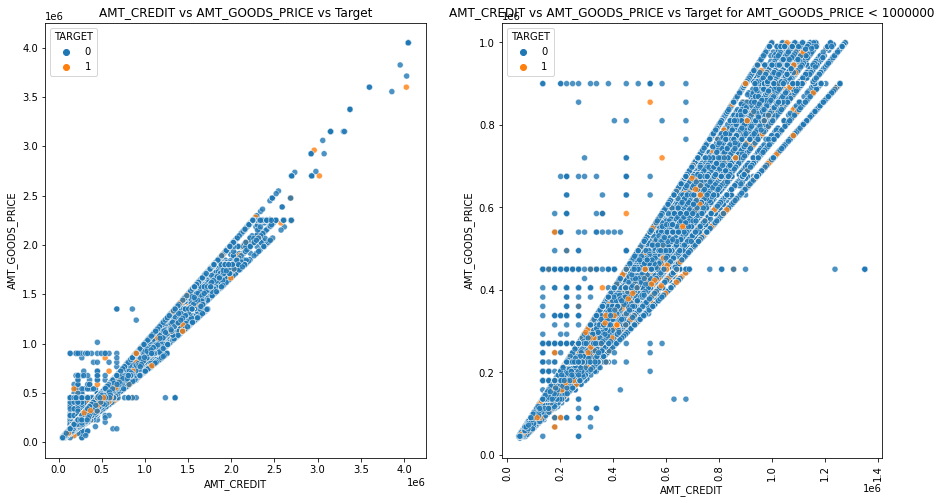

In [ ]:
#AMT_CREDIT, AMT_GOODS_PRICE vs TARGET
column_names = ['AMT_CREDIT', 'AMT_GOODS_PRICE']
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)

ax[0].set(title = column_names[0] + ' vs '+ column_names[1] + ' vs Target');
sns.scatterplot(x=column_names[0],y=column_names[1],hue='TARGET',data=application_data, alpha=0.8,ax=ax[0])
plt.xticks(rotation=90);

plt.title(column_names[0] + ' vs '+ column_names[1] + ' vs Target for AMT_GOODS_PRICE < 1000000');
sns.scatterplot(x=column_names[0],y=column_names[1],hue='TARGET',data=application_data[application_data['AMT_GOODS_PRICE'] <=1000000], alpha=0.8,ax=ax[1])
plt.xticks(rotation=90);

### Credit Amount and Price of Credit Goods
There is an overall linear relationship between Credit Amount and Price of Credit Goods.
Notice that more clients with payment difficulties are the ones who have borrowed lesser money for lesser priced goods.
And most outliers do not have payment difficulties.
Lower Credit Amount and Lower Price of Credit Goods have higher cases of Payment difficulties

In [ ]:
#NAME_CONTRACT_TYPE vs REGION_RATING_CLIENT_W_CITY vs TARGET

column_names = ['NAME_CONTRACT_TYPE','REGION_RATING_CLIENT_W_CITY']
application_data.groupby(column_names)['TARGET'].value_counts(normalize=True)

NAME_CONTRACT_TYPE  REGION_RATING_CLIENT_W_CITY  TARGET
Cash loans          1                            0        0.95
                                                 1        0.05
                    2                            0        0.92
                                                 1        0.08
                    3                            0        0.88
                                                 1        0.12
Revolving loans     1                            0        0.97
                                                 1        0.03
                    2                            0        0.94
                                                 1        0.06
                    3                            0        0.93
                                                 1        0.07
Name: TARGET, dtype: float64

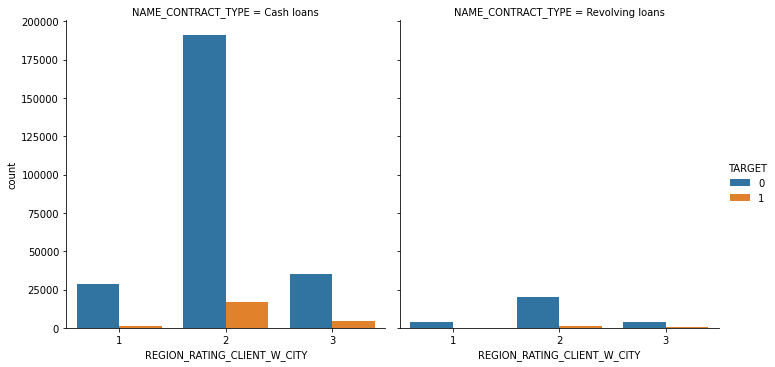

In [ ]:
sns.catplot(x='REGION_RATING_CLIENT_W_CITY', hue='TARGET', col="NAME_CONTRACT_TYPE", kind="count", data=application_data);

### Type of Loan and City Rating
In cash loans, Category 3 Cities have 7% more probability of payment difficulties than Category 1 Cities.
In Revolving loans, Category 3 Cities have 4% more probability of payment difficulties than Category 1 Cities.
Although this just confirms correlation between the City Rating and default, now we know that city rating has a higher impact on Cash Loans than Revolving Loans

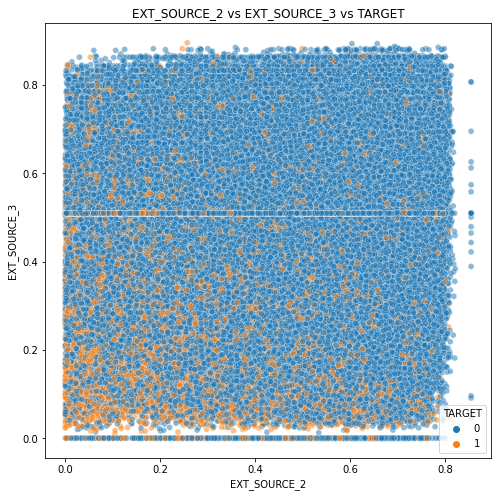

In [ ]:
# EXT_SOURCE_2 vs EXT_SOURCE_3 vs TARGET
creditScores = ['EXT_SOURCE_2','EXT_SOURCE_3']
plt.figure(figsize=[8,8])
sns.scatterplot(x=creditScores[0],y = creditScores[1], hue='TARGET',data = application_data, alpha=0.5);
plt.title(creditScores[0] + ' vs '+ creditScores[1]+ ' vs '+ 'TARGET');

### Credit Rating
Checking Credit Ratings from two different sources confirms that trend of customers with lower credit ratings have a higher default rate.

In [ ]:
#FLAG_OWN_CAR vs FLAG_OWN_REALTY vs TARGET
application_data.groupby(['FLAG_OWN_CAR','FLAG_OWN_REALTY'])['TARGET'].value_counts(normalize=True)

FLAG_OWN_CAR  FLAG_OWN_REALTY  TARGET
N             N                0        0.91
                               1        0.09
              Y                0        0.92
                               1        0.08
Y             N                0        0.93
                               1        0.07
              Y                0        0.93
                               1        0.07
Name: TARGET, dtype: float64

## Owning A Car & Realty
From the above table , we see that customers with no car or realty have a high probability of default (9%), followed by customers who don't have a car but own realty (8%)
Since there's not much difference posed by owning a car or realty vs not owning them, we cannot infer any trend in default using these variables

In [ ]:
# classification over both categories
pd.DataFrame(application_data.groupby(['CODE_GENDER','NAME_FAMILY_STATUS'])['TARGET'].value_counts(normalize=True))

TARGET
CODE_GENDER NAME_FAMILY_STATUS   TARGET        
F           Civil marriage       0         0.92
                                 1         0.08
            Married              0         0.93
                                 1         0.07
            Separated            0         0.93
                                 1         0.07
            Single / not married 0         0.92
                                 1         0.08
            Widow                0         0.95
                                 1         0.05
M           Civil marriage       0         0.87
                                 1         0.13
            Married              0         0.91
                                 1         0.09
            Separated            0         0.87
                                 1         0.13
            Single / not married 0         0.87
                                 1         0.13
            Widow                0         0.88
                                 1         0.12

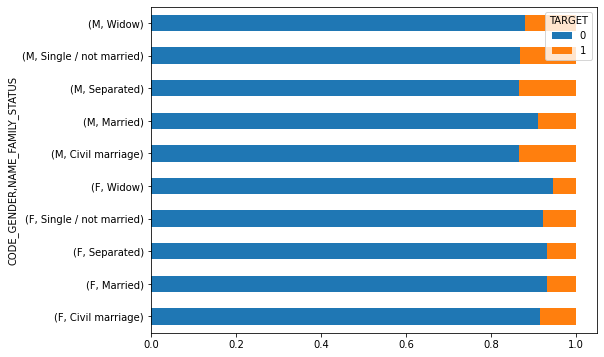

In [ ]:
application_data.groupby(['CODE_GENDER','NAME_FAMILY_STATUS'])['TARGET'].value_counts(normalize=True)\
.unstack()\
   .plot( 
    layout=(2,2),
    figsize=(8,6), kind='barh', stacked=True);

## Gender & Marital Status
Looking at the above values, customers most attractive to the bank by likelihood of default, are
'Female Widows' > 'Married Females' = 'Separated Females' > 'Single Females' > 'Married Males' > 'Male Widowers' > 'Single Males' = 'Separated Males'
The bank may focus their marketing campaigns on converting applications of Female Widows, Married Females, Separated Females
May note that the dataset is skewed towards Females than Males

In [ ]:
# NAME_HOUSING_TYPE vs NAME_INCOME_TYPE vs TARGET
income_housing = pd.DataFrame(application_data.groupby(['NAME_HOUSING_TYPE','NAME_INCOME_TYPE'])['TARGET'].value_counts(normalize=True))
income_housing.columns = ['Normalized Count']
income_housing 

Normalized Count
NAME_HOUSING_TYPE   NAME_INCOME_TYPE     TARGET                  
Co-op apartment     Commercial associate 0                   0.91
                                         1                   0.09
                    Pensioner            0                   0.96
                                         1                   0.04
                    State servant        0                   0.99
                                         1                   0.01
                    Working              0                   0.91
                                         1                   0.09
House / apartment   Businessman          0                   1.00
                    Commercial associate 0                   0.93
                                         1                   0.07
                    Maternity leave      0                   0.60
                                         1                   0.40
                    Pensioner            0                   0.95
                                         1                   0.05
                    State servant        0                   0.94
                                         1                   0.06
                    Student              0                   1.00
                    Unemployed           0                   0.65
                                         1                   0.35
                    Working              0                   0.91
                                         1                   0.09
Municipal apartment Commercial associate 0                   0.92
                                         1                   0.08
                    Pensioner            0                   0.93
                                         1                   0.07
                    State servant        0                   0.94
                                         1                   0.06
                    Unemployed           1                   1.00
                    Working              0                   0.90
                                         1                   0.10
Office apartment    Commercial associate 0                   0.93
                                         1                   0.07
                    Pensioner            0                   0.94
                                         1                   0.06
                    State servant        0                   0.96
                                         1                   0.04
                    Student              0                   1.00
                    Working              0                   0.92
                                         1                   0.08
Rented apartment    Commercial associate 0                   0.88
                                         1                   0.12
                    Pensioner            0                   0.93
                                         1                   0.07
                    State servant        0                   0.93
                                         1                   0.07
                    Student              0                   1.00
                    Unemployed           0                   1.00
                    Working              0                   0.86
                                         1                   0.14
With parents        Commercial associate 0                   0.90
                                         1                   0.10
                    Pensioner            0                   0.95
                                         1                   0.05
                    State servant        0                   0.91
                                         1                   0.09
                    Student              0                   1.00
                    Unemployed           0                   0.67
                                         1                   0.33
                    Wor

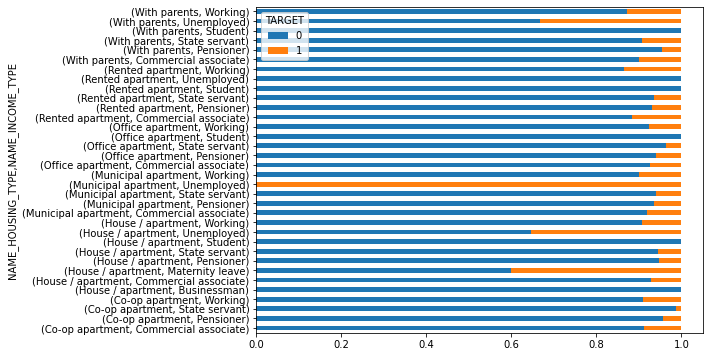

In [ ]:
application_data.groupby(['NAME_HOUSING_TYPE','NAME_INCOME_TYPE'])['TARGET'].value_counts(normalize=True)\
.unstack()\
   .plot( 
    layout=(2,2),
    figsize=(8,6), kind='barh', stacked=True);

In [ ]:
income_housing[np.in1d(income_housing.index.get_level_values(2), 1)].sort_values(by='Normalized Count', ascending=True)

Normalized Count
NAME_HOUSING_TYPE   NAME_INCOME_TYPE     TARGET                  
Co-op apartment     State servant        1                   0.01
Office apartment    State servant        1                   0.04
Co-op apartment     Pensioner            1                   0.04
With parents        Pensioner            1                   0.05
House / apartment   Pensioner            1                   0.05
                    State servant        1                   0.06
Office apartment    Pensioner            1                   0.06
Municipal apartment State servant        1                   0.06
Rented apartment    State servant        1                   0.07
Municipal apartment Pensioner            1                   0.07
Rented apartment    Pensioner            1                   0.07
House / apartment   Commercial associate 1                   0.07
Office apartment    Commercial associate 1                   0.07
                    Working              1                   0.08
Municipal apartment Commercial associate 1                   0.08
Co-op apartment     Commercial associate 1                   0.09
                    Working              1                   0.09
House / apartment   Working              1                   0.09
With parents        State servant        1                   0.09
                    Commercial associate 1                   0.10
Municipal apartment Working              1                   0.10
Rented apartment    Commercial associate 1                   0.12
With parents        Working              1                   0.13
Rented apartment    Working              1                   0.14
With parents        Unemployed           1                   0.33
House / apartment   Unemployed           1                   0.35
                    Maternity leave      1                   0.40
Municipal apartment Unemployed           1                   1.00

## Housing Type & Income Type
The above tables list the categories in the order of least likelihood of Payment difficulties
The top 5 categories are :
State servant living in Co-op apartment
State servant living in Office apartment
Pensioner living in Co-op apartment
Pensioner living With parents
Pensioner living in House / apartment
The bank may focus their marketing campaigns on converting applications of the above categories
Pensioner living With parents category doesn't seem right and may be further checked if it's an anomaly

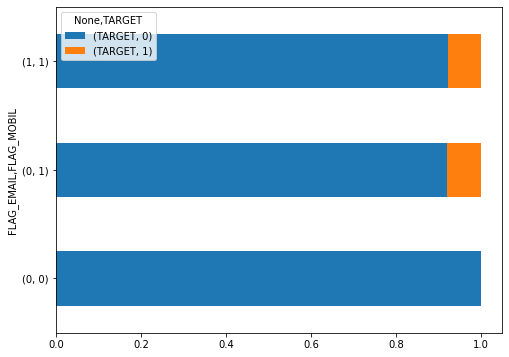

In [ ]:
#FLAG_EMAIL vs FLAG_MOBIL vs TARGET
pd.DataFrame(application_data.groupby(['FLAG_EMAIL','FLAG_MOBIL'])['TARGET'].value_counts(normalize=True))\
.unstack()\
   .plot( 
    layout=(2,2),
    figsize=(8,6), kind='barh', stacked=True);



In [ ]:
pd.DataFrame(application_data.groupby(['FLAG_EMAIL','FLAG_MOBIL'])['TARGET'].value_counts())

TARGET
FLAG_EMAIL FLAG_MOBIL TARGET        
0          0          0            1
           1          0       266617
                      1        23451
1          1          0        16068
                      1         1374

## Email & Mobile Information
8% of customers who have not provided Email but have provided a Mobile Number have had payment difficulties
Similarly 8% of customers who provided both Email and Mobile Number have had payment difficulties
Hence we cannot infer any conclusive trend in payment difficulties using these variables

Text(0.5, 1.0, 'FLAG_CONT_MOBILE vs DAYS_LAST_PHONE_CHANGE vs TARGET')

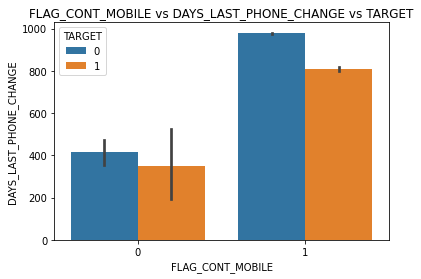

In [ ]:
# DAYS_LAST_PHONE_CHANGE vs FLAG_CONT_MOBILE vs TARGET

sns.barplot(x = 'FLAG_CONT_MOBILE', y= 'DAYS_LAST_PHONE_CHANGE', hue='TARGET',data = application_data)
plt.title("FLAG_CONT_MOBILE vs DAYS_LAST_PHONE_CHANGE vs TARGET")

Text(0.5, 1.0, 'FLAG_CONT_MOBILE vs DAYS_LAST_PHONE_CHANGE vs TARGET')

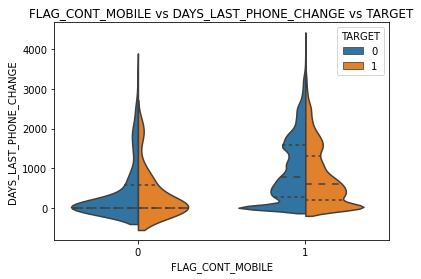

In [ ]:
sns.violinplot(x = 'FLAG_CONT_MOBILE', y= 'DAYS_LAST_PHONE_CHANGE', hue='TARGET', split=True, data = application_data,inner="quartile", height=5, aspect=1)
plt.title("FLAG_CONT_MOBILE vs DAYS_LAST_PHONE_CHANGE vs TARGET")

## Days Since Phone Number Changed & Whether was Phone was Reachable
Notice that the number of clients with reachable phones is higher than unreachable phones. (900 days vs 350 days)
Among clients with reachable phones, Clients with Payment difficulties have median newer phone numbers than All other cases. (See violin plot for FLAG_CONT_MOBILE = 1 )
Among clients with unreachable phones, the difference is less (50 days vs 200 days). In fact, the median age of phone number is same for defaulters and others.
We could conclude that clients with reachable and older phone numbers are better borrowers than other categories.When the phone is unreachable, last date of phone number change doesn't matter.

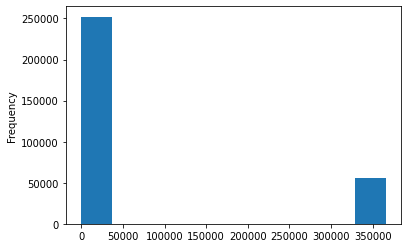

In [ ]:
application_data['DAYS_EMPLOYED'].plot.hist()

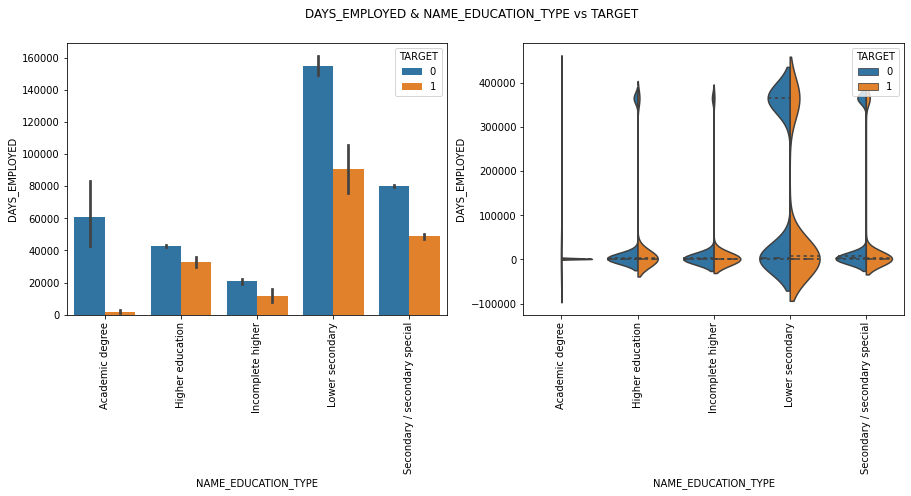

In [ ]:
#DAYS_EMPLOYED & NAME_EDUCATION_TYPE vs TARGET
fig,ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(15)

fig.suptitle(t="DAYS_EMPLOYED & NAME_EDUCATION_TYPE vs TARGET");
ax[0].tick_params(axis='x',rotation=90)
sns.barplot(x = 'NAME_EDUCATION_TYPE', y= 'DAYS_EMPLOYED', hue='TARGET',data = application_data,ax=ax[0])

ax[1].tick_params(axis='x',rotation=90)
# ax[1].set_yscale('log')
sns.violinplot(x = 'NAME_EDUCATION_TYPE', y= 'DAYS_EMPLOYED', hue='TARGET', split=True, data = application_data,inner="quartile", height=5, aspect=1, ax=ax[1])
#sns.swarmplot(x = 'NAME_EDUCATION_TYPE', y= 'DAYS_EMPLOYED', hue='TARGET', data = application_data, ax=ax[1])


## Employment Period & Education
The barplot between Days Employed and Education clearly shows that the clients holding an Academic Degree and having held employment for a long time have very low probability of default (difference between Target 0 , 1 of ~60000)
Among clients with Secondary education, there are two groups, ones who are recently employed and others with long term employment. The recently employed clients in this category have equal probability to default or not. But the clients long term employment have lower probability to default.
The bank may place emphasis on education and employment period. Higher education and long term employment are good indicators of no default.Further clients with secondary education are far more attractive borrowers when they have held long term employment than otherwise

In [ ]:
#CNT_CHILDREN & CNT_FAM_MEMBERS vs TARGET
subset = application_data[['CNT_CHILDREN','CNT_FAM_MEMBERS','TARGET']] 
subset = subset.dropna().astype('int')
childrenvsFamily = pd.pivot_table(index='CNT_CHILDREN', columns = 'CNT_FAM_MEMBERS',aggfunc=np.mean,data=subset)
childrenvsFamily

TARGET                                                         \
CNT_FAM_MEMBERS     1    2    3    4    5    6    7    8    9    10   11   12   
CNT_CHILDREN                                                                    
0                 0.08 0.07  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   
1                  nan 0.10 0.09  nan  nan  nan  nan  nan  nan  nan  nan  nan   
2                  nan  nan 0.10 0.09  nan  nan  nan  nan  nan  nan  nan  nan   
3                  nan  nan  nan 0.12 0.09  nan  nan  nan  nan  nan  nan  nan   
4                  nan  nan  nan  nan 0.04 0.13  nan  nan  nan  nan  nan  nan   
5                  nan  nan  nan  nan  nan 0.20 0.08  nan  nan  nan  nan  nan   
6                  nan  nan  nan  nan  nan  nan 0.00 0.32  nan  nan  nan  nan   
7                  nan  nan  nan  nan  nan  nan  nan 0.00 0.00  nan  nan  nan   
8                  nan  nan  nan  nan  nan  nan  nan  nan  nan 0.00  nan  nan   
9                  nan  nan  nan  nan  nan  nan  nan  nan  nan 1.00 1.00  nan   
10                 nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 0.00   
11                 nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   
12                 nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   
14                 nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   
19                 nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan   

                                          
CNT_FAM_MEMBERS   13   14   15   16   20  
CNT_CHILDREN                              
0                nan  nan  nan  nan  nan  
1                nan  nan  nan  nan  nan  
2                nan  nan  nan  nan  nan  
3                nan  nan  nan  nan  nan  
4                nan  nan  nan  nan  nan  
5                nan  nan  nan  nan  nan  
6                nan  nan  nan  nan  nan  
7                nan  nan  nan  nan  nan  
8                nan  nan  nan  nan  nan  
9                nan  nan  nan  nan  nan  
10               nan  nan  nan  nan  nan  
11              1.00  nan  nan  nan  nan  
12               nan 0.00  nan  nan  nan  
14               nan  nan 0.00 0.00  nan  
19               nan  nan  nan  nan 0.00

## Children & Family Members
These variables are chosen to verify the amplified liabilities of clients having both more children and more family members.
The most attractive sub-categories are the clients with 1 or 2 family members and 0 children.
This is followed by clients having 1 or 2 children with 3 or 4 family members.
Note that more than 5 children is deemed an error. This needs further analysis
Small families with less children has low risk of default

# NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL vs TARGET

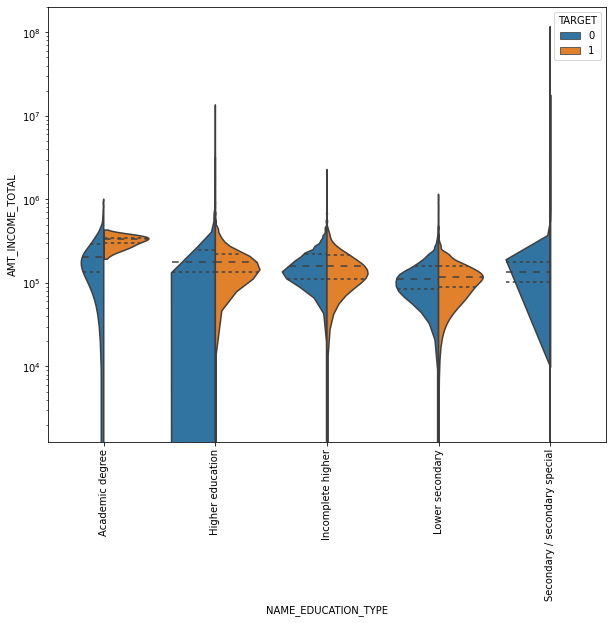

In [ ]:
# NAME_EDUCATION_TYPE vs AMT_INCOME_TOTAL vs TARGET 

plt.figure(figsize=(10,8))
sns.violinplot(x = 'NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', hue='TARGET', split=True, data = application_data,inner="quartile", height=5, aspect=3)
plt.yscale('log')
plt.xticks(rotation=90);

## Type of Income vs Amount of Income
For the same average income across income types, clients with Secondary Education have the lowest probability of default.
Among clients with an Academic Degree, median income of clients with payment difficulties is higher than all other cases.
Among clients with Higher Education, Incomplete Higher Education and Lower Secondary education, the median income has no correlation with risk of default.

In [ ]:
#'NAME_INCOME_TYPE vs NAME_EDUCATION_TYPE'
subset = application_data[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','TARGET']] 
subset = subset.dropna()
subset['TARGET'] = subset['TARGET'].astype('int')
# pivot table for percentage of default for education type vs income type
incomeTypevsEdu = pd.pivot_table(index='NAME_EDUCATION_TYPE', columns = 'NAME_INCOME_TYPE',aggfunc=[np.mean],data=subset)
incomeTypevsEdu

mean                       \
                                   TARGET                        
NAME_INCOME_TYPE              Businessman Commercial associate   
NAME_EDUCATION_TYPE                                              
Academic degree                       nan                 0.02   
Higher education                     0.00                 0.05   
Incomplete higher                     nan                 0.08   
Lower secondary                       nan                 0.12   
Secondary / secondary special         nan                 0.09   

                                                                               \
                                                                                
NAME_INCOME_TYPE              Maternity leave Pensioner State servant Student   
NAME_EDUCATION_TYPE                                                             
Academic degree                           nan      0.00          0.00     nan   
Higher education                         0.00      0.04          0.04    0.00   
Incomplete higher                         nan      0.04          0.07    0.00   
Lower secondary                           nan      0.07          0.08     nan   
Secondary / secondary special            1.00      0.06          0.07    0.00   

                                                  
                                                  
NAME_INCOME_TYPE              Unemployed Working  
NAME_EDUCATION_TYPE                               
Academic degree                      nan    0.03  
Higher education                    0.00    0.06  
Incomplete higher                   0.33    0.09  
Lower secondary                      nan    0.15  
Secondary / secondary special       0.54    0.11

In [ ]:
# pivot table of the count of defaults for education type vs income type
pd.pivot_table(index='NAME_EDUCATION_TYPE', columns = 'NAME_INCOME_TYPE',aggfunc='count',data=subset)

TARGET                       \
NAME_INCOME_TYPE              Businessman Commercial associate   
NAME_EDUCATION_TYPE                                              
Academic degree                       nan                43.00   
Higher education                    10.00            24,025.00   
Incomplete higher                     nan             3,400.00   
Lower secondary                       nan               460.00   
Secondary / secondary special         nan            43,689.00   

                                                                               \
NAME_INCOME_TYPE              Maternity leave Pensioner State servant Student   
NAME_EDUCATION_TYPE                                                             
Academic degree                           nan     26.00         23.00     nan   
Higher education                         3.00  8,188.00      8,863.00    6.00   
Incomplete higher                         nan    518.00        770.00    1.00   
Lower secondary                           nan  1,529.00        102.00     nan   
Secondary / secondary special            2.00 45,101.00     11,945.00   11.00   

                                                     
NAME_INCOME_TYPE              Unemployed    Working  
NAME_EDUCATION_TYPE                                  
Academic degree                      nan      72.00  
Higher education                    6.00  33,762.00  
Incomplete higher                   3.00   5,585.00  
Lower secondary                      nan   1,725.00  
Secondary / secondary special      13.00 117,630.00

## Education Type & Income Type
From the above pivot tables we could say that clients with Academic Degree have the least default risk.
The highest volume of applications are from clients with Secondary education. Among them, the least default risk is posed by Pensioners.
The next highest in terms of volume of applications is from clients with Higher Education. Among these, the least risk is posed by Pensioners and State Servants.
Note that there's not enough application from Businessmen with Higher Education to conclusively say they have very low risk of default.
Highest default risk is posed by Unemployed clients. Among them unemployed clients with Secondary Education have the higest risk of default.

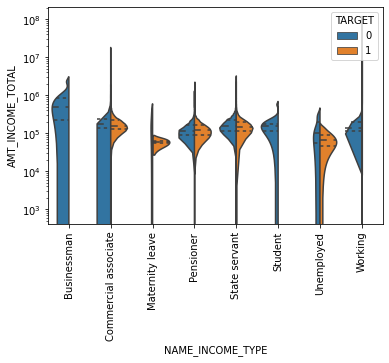

In [ ]:
sns.violinplot(x = 'NAME_INCOME_TYPE', y= 'AMT_INCOME_TOTAL', hue='TARGET', split=True, data = application_data,inner="quartile", height=5, aspect=3)
plt.yscale('log')
plt.xticks(rotation=90);

## Correlation Analysis
Correlation For Target : 0

In [ ]:
columnsForAnalysis


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_CONT_MOBILE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_LAST_PHONE_CHANGE',
 'AGE_YEARS',
 'AMT_INCOME_CAT',
 'AMT_CREDIT_RANGE']

In [ ]:
# function to correlate variables
def correlation(dataframe) : 
    cor0=dataframe[columnsForAnalysis].corr()
    type(cor0)
    cor0.where(np.triu(np.ones(cor0.shape),k=1).astype(np.bool))
    cor0=cor0.unstack().reset_index()
    cor0.columns=['VAR1','VAR2','CORR']
    cor0.dropna(subset=['CORR'], inplace=True)
    cor0.CORR=round(cor0['CORR'],2)
    cor0.CORR=cor0.CORR.abs()
    cor0.sort_values(by=['CORR'],ascending=False)
    cor0=cor0[~(cor0['VAR1']==cor0['VAR2'])]
    return pd.DataFrame(cor0.sort_values(by=['CORR'],ascending=False))

In [ ]:
# Correlation for Target : 0 
# Absolute values are reported 
pd.set_option('precision', 2)
cor_0 = correlation(application_data0)
cor_0.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
AMT_GOODS_PRICE,AMT_CREDIT,0.99
AMT_CREDIT,AMT_GOODS_PRICE,0.99
AMT_GOODS_PRICE,AMT_ANNUITY,0.78
AMT_ANNUITY,AMT_GOODS_PRICE,0.78
AMT_ANNUITY,AMT_CREDIT,0.77
AMT_CREDIT,AMT_ANNUITY,0.77
DAYS_EMPLOYED,AGE_YEARS,0.63
AGE_YEARS,DAYS_EMPLOYED,0.63
AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
AMT_INCOME_TOTAL,AMT_ANNUITY,0.42


## Top 10 correlations for Target : 0 are
AMT_GOODS_PRICE & AMT_CREDIT,
AMT_GOODS_PRICE & AMT_ANNUITY,
AMT_ANNUITY & AMT_CREDIT,
AGE_YEARS & DAYS_EMPLOYED,
AMT_ANNUITY & AMT_INCOME_TOTAL,
AMT_GOODS_PRICE & AMT_INCOME_TOTAL,
AMT_INCOME_TOTAL & AMT_CREDIT,
AGE_YEARS & EXT_SOURCE_3,
DAYS_LAST_PHONE_CHANGE & EXT_SOURCE_2,
DAYS_EMPLOYED & AMT_INCOME_TOTAL



### Correlation For Target : 1

In [ ]:
# Correlation for Target : 1 
# Absolute values are reported 
pd.set_option('precision', 2)
cor_1 = correlation(application_data1)
cor_1.style.background_gradient(cmap='GnBu').hide_index()

VAR1,VAR2,CORR
AMT_GOODS_PRICE,AMT_CREDIT,0.98
AMT_CREDIT,AMT_GOODS_PRICE,0.98
AMT_CREDIT,AMT_ANNUITY,0.75
AMT_ANNUITY,AMT_GOODS_PRICE,0.75
AMT_GOODS_PRICE,AMT_ANNUITY,0.75
AMT_ANNUITY,AMT_CREDIT,0.75
DAYS_EMPLOYED,AGE_YEARS,0.58
AGE_YEARS,DAYS_EMPLOYED,0.58
DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.21
EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,0.21


## Top 10 correlations for Target 1 are :
AMT_GOODS_PRICE & AMT_CREDIT,
AMT_CREDIT & AMT_ANNUITY,
AMT_ANNUITY & AMT_GOODS_PRICE,
AGE_YEARS & DAYS_EMPLOYED,
EXT_SOURCE_2 & DAYS_LAST_PHONE_CHANGE,
EXT_SOURCE_3 & AGE_YEARS,
AGE_YEARS & AMT_GOODS_PRICE,
AGE_YEARS & AMT_CREDIT,
AMT_GOODS_PRICE & EXT_SOURCE_2,
AMT_CREDIT & EXT_SOURCE_2

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307507 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  category
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
lst=[]
for i in application_data.select_dtypes('category'):
  lst.append(i)
    

In [ ]:
application_data[lst]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_CAT,AMT_CREDIT_RANGE
0,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,2,2,WEDNESDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000-225000,400000-450000
1,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,1,1,MONDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250000-275000,900000 and above
2,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,2,2,MONDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50000-75000,0-150000
3,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,2,2,WEDNESDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125000-150000,300000-350000
4,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,0,2,2,THURSDAY,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,100000-125000,500000-550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,1,1,0,1,0,0,1,1,THURSDAY,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,150000-175000,250000-300000
307507,0,Cash loans,F,N,Y,0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,1,0,0,1,1,0,2,2,MONDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50000-75000,250000-300000
307508,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Higher education,Separated,House / apartment,1,1,0,1,0,1,3,3,THURSDAY,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150000-175000,650000-700000
307509,1,Cash loans,F,N,Y,0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,1,0,0,2,2,WEDNESDAY,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150000-175000,350000-400000


In [ ]:
application_data[lst].shape

(307511, 48)

In [ ]:
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Business Entity Type 3','Business Entity Type 2','Business Entity Type 1'],'Self-employed')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['School','Kindergarten','University'],'Education')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Electricity','Military','Security Ministries','Police','Postal'],'Government')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Transport: type 3','Transport: type 2','Transport: type 1'],'Transport')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Trade: type 1','Trade: type 2','Trade: type 3','Trade: type 4','Trade: type 5','Trade: type 6','Trade: type 7'],'Trade')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Industry: type 1','Industry: type 2','Industry: type 3','Industry: type 4','Industry: type 5','Industry: type 6','Industry: type 7','Industry: type 8','Industry: type 9','Industry: type 10','Industry: type 11','Industry: type 12','Industry: type 13'],'Industry')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Religion', 'Medicine','Construction', 'Housing','Services','Agriculture', 'Restaurant', 'Culture', 'Hotel','Bank','Insurance','Mobile','Legal Services', 'Advertising','Cleaning','Telecom','Realtor' ],'Other')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Emergency','Security'],'Other')
application_data['ORGANIZATION_TYPE']=application_data['ORGANIZATION_TYPE'].replace(['Transport: type 4'],'Transport')

In [ ]:
application_data['ORGANIZATION_TYPE'].value_counts()

Self-employed    122941
Other             54020
Government        20460
Education         17100
Trade             14315
Industry          14311
Transport          8990
Name: ORGANIZATION_TYPE, dtype: int64

In [ ]:
application_data['ORGANIZATION_TYPE'].unique()

array(['Self-employed', 'Education', 'Government', 'Other', nan,
       'Transport', 'Trade', 'Industry'], dtype=object)

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307507 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  category
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [ ]:
application_data[lst].head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_CAT,AMT_CREDIT_RANGE
0,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,1,0,2,2,WEDNESDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200000-225000,400000-450000
1,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,House / apartment,1,1,0,1,1,0,1,1,MONDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250000-275000,900000 and above
2,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,1,1,1,0,2,2,MONDAY,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50000-75000,0-150000
3,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,0,1,0,0,2,2,WEDNESDAY,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125000-150000,300000-350000
4,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,1,0,1,0,0,2,2,THURSDAY,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,100000-125000,500000-550000


In [ ]:
for i in lst:
  print(application_data[i].value_counts())
  print()

0    282686
1     24825
Name: TARGET, dtype: int64

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave

In [ ]:
application_data = application_data.drop(columns=['CNT_CHILDREN','SK_ID_CURR'])
lst.remove('CNT_CHILDREN')

In [ ]:
cat_lst = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE',
           'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
           'WEEKDAY_APPR_PROCESS_START','AMT_INCOME_CAT','AMT_CREDIT_RANGE']

In [ ]:
num_lst = [i for i in lst if i not in cat_lst]
num_lst

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
len(lst), len(cat_lst), len(num_lst)

(47, 12, 35)

In [ ]:
application_data[num_lst] = application_data[num_lst].astype('float')

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       307511 non-null  float64 
 1   NAME_CONTRACT_TYPE           307511 non-null  category
 2   CODE_GENDER                  307507 non-null  category
 3   FLAG_OWN_CAR                 307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  category
 10  NAME_INCOME_TYPE             307511 non-null  category
 11  NAME_EDUCATION_TYPE          307511 non-null  category
 12  NAME_FAMILY_STATUS           307509 non-null

In [ ]:
application_data['AMT_CREDIT_RANGE'].nunique()

17

In [ ]:
k1 = ('0-150000','150000-200000','200000-250000','250000-300000','300000-350000','350000-400000',
      '400000-450000','450000-500000','500000-550000','550000-600000','600000-650000',
      '650000-700000','700000-750000','750000-800000','800000-850000','850000-900000',
      '900000 and above')

v1 = range(1,18)

In [ ]:
e1 = dict(zip(k1,v1))

In [ ]:
application_data['AMT_INCOME_CAT'].nunique()

20

In [ ]:
k2 = ('0-25000','25000-50000','50000-75000','75000-100000','100000-125000',
      '125000-150000','150000-175000','175000-200000','200000-225000','225000-250000',
      '250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
      '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above')

In [ ]:
len(k2)

21

In [ ]:
v2 = range(1,22)

In [ ]:
e2 = dict(zip(k2,v2))

In [ ]:
application_data['AMT_CREDIT_RANGE'] = application_data['AMT_CREDIT_RANGE'].replace(e1)
application_data['AMT_INCOME_CAT'] = application_data['AMT_INCOME_CAT'].replace(e2)

In [ ]:
application_data[['AMT_INCOME_CAT','AMT_CREDIT_RANGE']] = application_data[['AMT_INCOME_CAT','AMT_CREDIT_RANGE']].astype('float')

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   TARGET                       307511 non-null  float64 
 1   NAME_CONTRACT_TYPE           307511 non-null  category
 2   CODE_GENDER                  307507 non-null  category
 3   FLAG_OWN_CAR                 307511 non-null  category
 4   FLAG_OWN_REALTY              307511 non-null  category
 5   AMT_INCOME_TOTAL             307511 non-null  float64 
 6   AMT_CREDIT                   307511 non-null  float64 
 7   AMT_ANNUITY                  307511 non-null  float64 
 8   AMT_GOODS_PRICE              307511 non-null  float64 
 9   NAME_TYPE_SUITE              307511 non-null  category
 10  NAME_INCOME_TYPE             307511 non-null  category
 11  NAME_EDUCATION_TYPE          307511 non-null  category
 12  NAME_FAMILY_STATUS           307509 non-null

In [ ]:
obj = list(application_data.select_dtypes('category').columns)

In [ ]:
obj

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [ ]:
application_data[obj] = application_data[obj].astype(object)

In [ ]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  float64
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307507 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307509 non-null  object 
 13 

In [ ]:
final_df = pd.get_dummies(application_data, drop_first=True)
final_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AMT_INCOME_CAT,AMT_CREDIT_RANGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport
0,1.00,"202,500.00","406,597.50","24,700.50","351,000.00",0.02,"9,461.00",637.00,"3,648.00","2,120.00",1.00,1.00,0.00,1.00,1.00,0.00,1.00,2.00,2.00,10,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.14,2.00,2.00,2.00,2.00,"1,134.00",0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,25.00,9.00,7.00,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.00,"270,000.00","1,293,502.50","35,698.50","1,129,500.00",0.00,"16,765.00","1,188.00","1,186.00",291.00,1.00,1.00,0.00,1.00,1.00,0.00,2.00,1.00,1.00,11,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.51,1.00,0.00,1.00,0.00,828.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,11.00,17.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.00,"67,500.00","135,000.00","6,750.00","135,000.00",0.01,"19,046.00",225.00,"4,260.00","2,531.00",1.00,1.00,1.00,1.00,1.00,0.00,1.00,2.00,2.00,9,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.73,0.00,0.00,0.00,0.00,815.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,52.00,3.00,1.00,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.00,"135,000.00","312,682.50","29,686.50","297,000.00",0.01,"19,005.00","3,039.00","9,833.00","2,437.00",1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,17,0.00,0.00,0.00,0.00,0.00,0.00,0.65,0.51,2.00,0.00,2.00,0.00,617.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,52.00,6.00,5.00,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0

In [ ]:
final_df.shape

(307511, 99)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
final_df = pd.DataFrame(sc.fit_transform(final_df), columns=final_df.columns, index=final_df.index)

In [ ]:
final_df.head()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AMT_INCOME_CAT,AMT_CREDIT_RANGE,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport
0,3.37,0.14,-0.48,-0.17,-0.51,-0.15,-1.51,-0.48,-0.38,-0.58,0.00,0.47,-0.50,0.04,1.60,-0.25,-1.27,-0.10,-0.06,-0.63,-0.12,-0.23,-0.21,-0.29,-0.55,-0.47,-1.32,-2.13,0.24,4.16,0.25,5.25,0.21,-0.01,0.64,-0.01,-0.12,-0.31,-0.01,-0.30,-0.06,-0.00,-0.06,-0.00,-0.06,-0.05,-0.03,-0.10,-0.02,-0.09,-0.02,-0.02,-0.02,-0.44,-1.54,0.55,-0.40,-0.32,1.39,-0.72,0.66,-0.39,-0.03,-0.05,-0.08,-0.20,0.48,-0.55,-0.00,-0.47,-0.28,-0.01,-0.01,0.97,-0.57,-0.19,-0.11,0.64,-1.33,-0.26,2.40,-0.23,0.36,-0.19,-0.09,-0.13,-0.23,-0.44,-0.35,-0.24,-0.44,-0.46,2.22,-0.27,-0.22,-0.46,1.23,-0.22,-0.17
1,-0.30,0.43,1.73,0.59,1.60,-1.25,0.17,-0.48,-1.08,-1.79,0.00,0.47,-0.50,0.04,1.60,-0.25,-0.17,-2.07,-2.05,-0.33,-0.12,-0.23,-0.21,-0.29,-0.55,-0.47,0.57,-0.00,-0.17,-0.32,-0.17,-0.28,-0.16,-0.01,0.64,-0.01,-0.12,-0.31,-0.01,-0.30,-0.06,-0.00,-0.06,-0.00,-0.06,-0.05,-0.03,-0.10,-0.02,-0.09,-0.02,-0.02,-0.02,-1.01,0.13,1.14,1.41,-0.32,-0.72,-0.72,-1.50,2.58,-0.03,-0.05,-0.08,-0.20,-2.08,-0.55,-0.00,-0.47,3.63,-0.01,-0.01,-1.03,1.76,-0.19,-0.11,-1.57,0.75,-0.26,-0.42,-0.23,0.36,-0.19,-0.09,-0.13,-0.23,2.25,-0.35,-0.24,-0.44,-0.46,-0.45,-0.27,-0.22,-0.46,-0.82,-0.22,-0.17
2,-0.30,-0.43,-1.15,-1.40,-1.09,-0.78,0.69,-0.48,-0.21,-0.31,0.00,0.47,2.00,0.04,1.60,-0.25,-1.27,-0.10,-0.06,-0.94,-0.12,-0.23,-0.21,-0.29,-0.55,-0.47,0.22,1.25,-0.59,-0.32,-0.59,-0.28,-0.18,-0.01,-1.56,-0.01,-0.12,-0.31,-0.01,-0.30,-0.06,-0.00,-0.06,-0.00,-0.06,-0.05,-0.03,-0.10,-0.02,-0.09,-0.02,-0.02,-0.02,-1.01,0.72,-1.24,-1.49,3.08,1.39,1.39,0.66,-0.39,-0.03,-0.05,-0.08,-0.20,0.48,-0.55,-0.00,-0.47,-0.28,-0.01,-0.01,0.97,-0.57,-0.19,-0.11,0.64,-1.33,-0.26,2.40,-0.23,0.36,-0.19,-0.09,-0.13,-0.23,2.25,-0.35,-0.24,-0.44,-0.46,-0.4

In [ ]:
final_df.to_csv('/content/drive/MyDrive/dataset/final_df.csv')

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#x=final_df.drop(columns=['Target'])
#y = final_df['Target']

In [ ]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
#from sklearn.model_selection import cross_val_score,KFold
#from sklearn.metrics import make_scorer

In [ ]:
#m1 = LogisticRegression()
#m2 = DecisionTreeClassifier()
#m3 = RandomForestClassifier()
#m4 = KNeighborsClassifier()
#m5 = XGBClassifier()
#m6 = GaussianNB()

In [ ]:
#model_name = ['LR','DT','RF','KNN','XG','NB']
#kf = KFold(n_splits=5,shuffle=True,random_state=0)
#for name,model in zip(model_name,[m1,m2,m3,m4,m5,m6]):
#    scores = cross_val_score(model,x,y,cv=kf,scoring='f1')
#    per = np.mean(scores)
#    bias = 1 - np.mean(scores)
#    var = np.std(scores,ddof=1)/np.mean(scores)
#    print(name,':', per,bias,var)